<img src="https://www.mbitschool.com/wp-content/uploads/2020/08/LOGO.png" width="250px" align="right" CLASS="TextWrap">

## Proyecto fin de Máster.
#### Máster  Executive Data Science para profesionales.

###  dataset keepa (amazon price tracker).

 __Autores__:
+ Edson Rodrigues.
+ Héctor Fernández.
+ Keyla Flores.
<br>

### Objetivo

El objetivo del presente trabajo no es más que la predicción del precio de los productos de amazon aplicado a un problema de regresión. A continuación, se detellará el dataset utilizado.

### Conjunto de datos

El conjunto de datos con el que vamos a trabajar lo obtenemos de la **aplicación KEEPA** y esta formado por una serie de variables que definen los productos vendidos por **Amazon**. El fichero en cuestión, para este caso se llama **'Best_Seller_List.2021_02_23.products (ACTUAL).csv'**. Se pretende hacer una primera prueba realizando una predicción de la columna del precio actual de amazon (nuevo). El tamaño del dataset queda simplificado a varias columnas las cuales se describirán a continuación.

Las variables se explican en el siguiente enlace:

https://docs.google.com/spreadsheets/d/19Ka0h4ut6jfDLCuEgBPDIemC0l2hzwM_/edit?hl=es#gid=2053528801

In [1]:
#Importación de librerías

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import plotly.express as px

from sklearn.metrics         import recall_score
from sklearn.metrics         import classification_report
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score

from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.tree            import ExtraTreeClassifier
from sklearn.svm             import SVC
from sklearn.naive_bayes     import GaussianNB

from sklearn.linear_model    import LogisticRegression
from sklearn.linear_model    import SGDClassifier

from sklearn.ensemble        import RandomForestClassifier
from sklearn.ensemble        import AdaBoostClassifier
from sklearn.ensemble        import BaggingClassifier
from sklearn.ensemble        import GradientBoostingClassifier

from sklearn.preprocessing   import MinMaxScaler

from xgboost                 import XGBClassifier

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling  import RandomOverSampler
from imblearn.combine        import SMOTETomek
from imblearn.ensemble       import BalancedBaggingClassifier

## Análisis exploratorio
#### Importación de datos. Importamos los datos para poder iniciar el análisis de estos. Al importarlos, agregamos una columna "fecha" que nos servirá para poder comparar los datos semana a semana.

In [2]:
#Impormos los datos de keepa con la fecha de descarga
df = pd.read_csv("/Users/keylafloresguerrero/Desktop/TFM/data_semana1_20.csv", low_memory=False)

In [3]:
df.shape

(694882, 134)

In [4]:
#para ver todas las columnas/filas voy a ampliar rangos.
pd.options.display.max_columns = None
pd.set_option('display.max.columns',200)
pd.set_option('display.max.rows',200)
pd.set_option('display.width',200)

In [5]:
df.dtypes

Amazon: Stock                                      float64
Locale                                              object
Imagen                                              object
Título                                              object
Rango de ventas: Actual                            float64
Rango de ventas: 30 days avg.                      float64
Rango de ventas: 90 days avg.                      float64
Rango de ventas: 180 days avg.                     float64
Rango de ventas: 30 days drop %                     object
Rango de ventas: 90 days drop %                     object
Rango de ventas: Lowest                              int64
Rango de ventas: Highest                             int64
Rango de ventas: Drops last 30 days                float64
Rango de ventas: Drops last 90 days                float64
Rango de ventas: Drops last 180 days               float64
Rango de ventas: Reference                          object
Rango de ventas: Subcategory Sales Ranks            obje

In [6]:
df.head(5)

,Amazon: Stock,Locale,Imagen,Título,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,Last Price Change,Last Update,Last Offer Update,Amazon: Actual,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: 30 days drop %,Amazon: 90 days drop %,Amazon: Lowest,Amazon: Highest,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Restricción MAP,Nuevo: Actual,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Nuevo: Lowest,Nuevo: Highest,Lowest FBA Seller,Lowest FBM Seller,Usado: Actual,Usado: 30 days avg.,Usado: 90 days avg.,Usado: 180 days avg.,Usado: 30 days drop %,Usado: 90 days drop %,Usado: Lowest,Usado: Highest,Lista de precio: Actual,Lista de precio: 30 days avg.,Lista de precio: 90 days avg.,Lista de precio: 180 days avg.,Lista de precio: 30 days drop %,Lista de precio: 90 days drop %,Lista de precio: Lowest,Lista de precio: Highest,Oferta flash: Actual,Oferta flash: Upcoming Deal,Oferta de almacén: Actual,Oferta de almacén: 30 days avg.,Oferta de almacén: 90 days avg.,Oferta de almacén: 180 days avg.,Oferta de almacén: 30 days drop %,Oferta de almacén: 90 days drop %,Oferta de almacén: Lowest,Oferta de almacén: Highest,Reacondicionado: Actual,Reacondicionado: 30 days avg.,Reacondicionado: 90 days avg.,Reacondicionado: 180 days avg.,Reacondicionado: 30 days drop %,Reacondicionado: 90 days drop %,Reacondicionado: Lowest,Reacondicionado: Highest,Trade-In: Actual,Trade-In: 30 days avg.,Trade-In: 90 days avg.,Trade-In: 180 days avg.,Trade-In: 30 days drop %,Trade-In: 90 days drop %,Trade-In: Lowest,Trade-In: Highest,Tracking since,Listed since,URL: Amazon,URL: Keepa,ASIN,Product Codes: EAN,Product Codes: UPC,Product Codes: PartNumber,Parent ASIN,Variation ASINs,Freq. Bought Together,Manufacturer,Brand,Product Group,Model,Variation attributes,Color,Tamaño,Edición,Formato,Author,Binding,Number of Items,Number of Pages,Publication Date,Release Date,Languages,Item: Dimension (cm³),Item: Length (cm),Item: Width (cm),Item: Height (cm),Item: Weight (g),Trade-In Eligible,Prime Eligible (Amazon offer),Subscribe and Save,One Time Coupon: Absolute,One Time Coupon: Percentage,Subscribe and Save Coupon: Percentage,Fecha,Variation Attributes,Nuevo: 90 days OOS,Usado: 90 days OOS,Ratings - Format Specific,Review Count - Format Specific,Prime Eligible (Buy Box),Caja de Compra (Buy Box) 🚚: 90 days OOS
0,NaN,es,https://images-na.ssl-images-amazon.com/images...,Poco X3 Pro Smartphone RAM 6GB ROM 128GB 120Hz...,3.0,34.0,34.0,34.0,91 %,91 %,3,473,8.0,8.0,8.0,Electrónica,# 1 | Top 1% | Móviles y smartphones libres,2.5,2.0,1.0,1.0,1.0,2021/03/29 01:02,2021/03/29 20:48,2021/03/29 10:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100 %,no Amazon offer exists,no,€ 199.00,€ 206.19,€ 206.19,€ 206.19,3 %,3 %,€ 199.00,€ 249.00,"A2WXPJ19BN8LD8, A2WXPJ19BN8LD8",A1MDLRY2F6AYEQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€ 249.00,€ 249.00,€ 249.00,€ 249.00,0 %,0 %,€ 249.00,€ 249.00,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021/03/16,2021/03/10,https://www.amazon.es/dp/B08YJFSHFM,https://keepa.com/#!product/9-B08YJFSHFM,B08YJFSHFM,6934177738272,NaN,NaN,B08YJLZRQC,"B08YKDKZTX,B08YJFSHFM",NaN,Xiaomi,Xiaomi,Electrónica,NaN,Size: 6+128GB; Color: Negro;,Negro,6+128GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,no,-,-,-,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,es,https://images-na.ssl-image

Al hacer una primera visualizacion del dataset, vemos que hay muchas variables que tienen excesivos NaN, con lo cual, vamos a proceder a borrar directamente estas columnas teniendo en cuenta también el valor que pueden aportar estas en el análisis. 

Borraremos también columnas con datos similares.

In [7]:
#vemos variables con valores ausentes
df.isnull().any()

Amazon: Stock                                       True
Locale                                             False
Imagen                                              True
Título                                             False
Rango de ventas: Actual                             True
Rango de ventas: 30 days avg.                       True
Rango de ventas: 90 days avg.                       True
Rango de ventas: 180 days avg.                      True
Rango de ventas: 30 days drop %                     True
Rango de ventas: 90 days drop %                     True
Rango de ventas: Lowest                            False
Rango de ventas: Highest                           False
Rango de ventas: Drops last 30 days                 True
Rango de ventas: Drops last 90 days                 True
Rango de ventas: Drops last 180 days                True
Rango de ventas: Reference                          True
Rango de ventas: Subcategory Sales Ranks            True
Reviews: Valoraciones          

### Identificación de campos/variables con un único valor 

In [8]:
# compruebo que hay valores unicos para poder borrarlos directamente
df.apply(pd.Series.nunique) == 1

Amazon: Stock                                      False
Locale                                              True
Imagen                                             False
Título                                             False
Rango de ventas: Actual                            False
Rango de ventas: 30 days avg.                      False
Rango de ventas: 90 days avg.                      False
Rango de ventas: 180 days avg.                     False
Rango de ventas: 30 days drop %                    False
Rango de ventas: 90 days drop %                    False
Rango de ventas: Lowest                            False
Rango de ventas: Highest                           False
Rango de ventas: Drops last 30 days                False
Rango de ventas: Drops last 90 days                False
Rango de ventas: Drops last 180 days               False
Rango de ventas: Reference                         False
Rango de ventas: Subcategory Sales Ranks           False
Reviews: Valoraciones          

### Eliminación de variables en función de los NaN, valores únicos y sentido de negocio.

+ **Author**: tiene muchos valores ausentes y además es una variable idéntica a la variable **Brand** por lo que conservamos esta última por tener menos ausentes.

+ **Manufacturer**: tiene muchos ausentes y es la misma columna que **Brand**.

+ **Edición**: tiene muchos ausentes y además no aportan valor. Hace referencia a la fecha que se creo el producto y no tiene mucho sentido en artículos de la categoría electrónica.

+ **Number of Pages**: tiene muchos ausentes y además no aportan valor.

+ **Languages**: tiene muchos ausentes y además no aporta valor. Se refiere al idioma del manual del producto.

+ **Edición**: tiene muchos ausentes y además no aportan valor.

+ **Number of Pages**: tiene muchos ausentes y además no aportan valor.

+ **Manufacturer**: Es la misma columna que Brand.

+ **Languages**: tiene muchos ausentes y además no aporta valor. Se refiere al idioma del manual del producto.

+ **Number of Items**: hace referencia al número de artículos que contiene el producto, tiene muchos valores ausentes y consideramos que no nos es útil de cara al análisis.

+ **Number of Pages**: indica el número de páginas que tiene un libro, pero en este caso al analizar productos electrónicos no tiene sentido considerarla en el análisis.

+ **Publication Date**: indica la fecha de públicación del artículo pero orientado a libros, como estamos tratando la categoría de electrónica no nos aporta información.

+ **Release Date**:indica la fecha de lanzamiento del producto. Consideramos que la fecha de lanzamiento no es un punto relevante a tener en cuenta para el análisis, principalmente porque no viene informada en la mayoría de los casos y es una variable que no podemos generar, extrapolar, etc en función de los datos que tenemos.

+ **Subscribe and Save Coupon: Percentage**: la variable no tiene datos fiables. Deriva de la variable Subscribe and Save así que nos quedamos con ésta última al poseer más información aunque sea agregada.

+ **Freq. Bought Together**: Indica productos complementarios, pero tiene muchos ausentes por eso consideramos la variable irrelevante.

+ **Restricción MAP**: indica si puedes seguir o no seguir el seguimiento del producto en la venta. Al ser siempre "no" la eliminamos.

+ **Locale:** posee un único valor, lo podemos obviar.

+ **Trade-In Eligible**: posee un único valor, lo podemos obviar.

+ **Color**: consideramos que no aportan el suficiente valor.

+ **Model**: consideramos que no aportan el suficiente valor.

+ **Variation attributes**: consideramos que no aportan el suficiente valor.

+ **'Rango de ventas: Reference**: hace referencia a la categoría, la eliminamos ya que todos los productos corresponden a la categoría electrónica.

+ **Binding**: igual a la variable product group.

+ **Tamaño**: no aporta valor en nuestro conjunto de datos.

+ **Item: Dimension, Length, Width, Height, Weight**: keepa es una plataforma destinda a la reventa para nuestro caso no nos interesan.

+ **Listed since**: solo nos interesa desde cuando está rastreado el producto ya que obtenemos el precio y demás características.

+ **Reacondicionado: Actual**: esta variable indica si el producto es reacondicionado, posee demasiados ausentes lo que hace díficil analizarla, además entendemos que posee una gran dependencia respecto el precio actual. Incluye todas las variables que derivan de ésta.

+ **Trade-In**: indica la posibilidad de intercambiar el producto. Todos sus valores son ausentes. No influye en los objetivos perseguidos. Incluye todas las variables que derivan de ésta.

+ **URL: Amazon y URL: Keepa**: son las urls de los productos, tanto en la plataforma Keepa como en Amazon. Las eliminamos porque no aportan nada de valor a nuestro modelo.

+ **Product Code**: Eliminamos las variables relacionadas con EAN o códigos de productos similares ya que hemos conservado el autentificador único ASIN 
 ('Product Codes: EAN'
'Product Codes: UPC'
'Product Codes: PartNumber'
'Parent ASIN'
'Variation ASINs')

In [9]:
df = df.drop(columns=['Restricción MAP',
                    'Listed since',
                    'Product Codes: EAN',
                    'Product Codes: UPC',
                    'Product Codes: PartNumber',
                    'Parent ASIN',
                    'Variation ASINs',
                    'Freq. Bought Together',
                    'Manufacturer',
                    'Model',
                    'Variation attributes',
                    'Color',
                    'Tamaño',
                    'Edición',
                    'Formato',
                    'Author',
                    'Binding',
                    'Number of Items',
                    'Number of Pages',
                    'Publication Date',
                    'Release Date',
                    'Languages',
                    'Item: Dimension (cm³)',
                    'Item: Length (cm)',
                    'Item: Width (cm)',
                    'Item: Height (cm)',
                    'Item: Weight (g)',
                    'Trade-In Eligible',
                    'Subscribe and Save',
                    'One Time Coupon: Absolute',
                    'One Time Coupon: Percentage',
                    'Subscribe and Save Coupon: Percentage',
                    'Lowest FBM Seller',
                    'Lowest FBA Seller',
                    'Locale',
                    'Amazon: Stock',
                    'Reacondicionado: Actual',
                    'Reacondicionado: 30 days avg.',
                    'Reacondicionado: 90 days avg.',
                    'Reacondicionado: 180 days avg.',
                    'Reacondicionado: 30 days drop %',
                    'Reacondicionado: 90 days drop %',
                    'Reacondicionado: Lowest',
                    'Reacondicionado: Highest',
                    'Trade-In: Actual',
                    'Trade-In: 30 days avg.',
                    'Trade-In: 90 days avg.',
                    'Trade-In: 180 days avg.',
                    'Trade-In: 30 days drop %',
                    'Trade-In: 90 days drop %',
                    'Trade-In: Lowest',
                    'Trade-In: Highest',
                    'URL: Amazon',
                    'URL: Keepa'])

Borrando las variables indicadas nuestro dataset se reduce un 40% ahora podemos avanzar a un analisis estadistico. 

In [10]:
df.shape

(694882, 80)

### Estadísticos
Antes de comenzar con las visualizaciones de cada variable, fijémonos en los estadísticos básicos.

In [11]:
df.dtypes

Imagen                                              object
Título                                              object
Rango de ventas: Actual                            float64
Rango de ventas: 30 days avg.                      float64
Rango de ventas: 90 days avg.                      float64
Rango de ventas: 180 days avg.                     float64
Rango de ventas: 30 days drop %                     object
Rango de ventas: 90 days drop %                     object
Rango de ventas: Lowest                              int64
Rango de ventas: Highest                             int64
Rango de ventas: Drops last 30 days                float64
Rango de ventas: Drops last 90 days                float64
Rango de ventas: Drops last 180 days               float64
Rango de ventas: Reference                          object
Rango de ventas: Subcategory Sales Ranks            object
Reviews: Valoraciones                              float64
Reviews: Recuento de Revisiones                    float

#### Variables categóricas. Transformación de variables. 

In [12]:
pd.set_option('display.max_columns', 150)
df.describe(include='object')

,Imagen,Título,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Last Price Change,Last Update,Last Offer Update,Amazon: Actual,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: 30 days drop %,Amazon: 90 days drop %,Amazon: Lowest,Amazon: Highest,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Nuevo: Actual,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Nuevo: Lowest,Nuevo: Highest,Usado: Actual,Usado: 30 days avg.,Usado: 90 days avg.,Usado: 180 days avg.,Usado: 30 days drop %,Usado: 90 days drop %,Usado: Lowest,Usado: Highest,Lista de precio: Actual,Lista de precio: 30 days avg.,Lista de precio: 90 days avg.,Lista de precio: 180 days avg.,Lista de precio: 30 days drop %,Lista de precio: 90 days drop %,Lista de precio: Lowest,Lista de precio: Highest,Oferta flash: Actual,Oferta flash: Upcoming Deal,Oferta de almacén: Actual,Oferta de almacén: 30 days avg.,Oferta de almacén: 90 days avg.,Oferta de almacén: 180 days avg.,Oferta de almacén: 30 days drop %,Oferta de almacén: 90 days drop %,Oferta de almacén: Lowest,Oferta de almacén: Highest,Tracking since,ASIN,Brand,Product Group,Prime Eligible (Amazon offer),Fecha,Variation Attributes,Nuevo: 90 days OOS,Usado: 90 days OOS,Prime Eligible (Buy Box),Caja de Compra (Buy Box) 🚚: 90 days OOS
count,694745,694882,694570,694570,694565,692551,694882,694882,682272,192333,224961,252438,275208,192333,192333,314869,314869,694882,694882,671462,690590,692213,693276,671462,671462,694745,694745,135844,238453,291176,330369,135844,135844,385359,385359,195005,380257,468653,520963,195005,195005,614797,614797,3038,694882,54327,169103,214619,250866,54327,54327,326333,326333,694882,694882,691224,694882,409951,694882,293526,539899,539899,284931,154963
unique,104424,50971,572,637,16,66522,82414,36263,64008,21396,45706,48456,49936,194,201,13383,11807,102,5,24060,54841,56899,58016,263,270,12680,15398,20129,41870,43166,43670,185,190,13061,11203,6679,27003,34880,39174,178,203,11253,11173,701,2,14187,35227,36061,36616,145,138,12851,10434,3149,48153,8134,48,2,139,13041,102,101,2,102
top,https://images-na.ssl-images-amazon.com/images...,"Xiaomi Mi TV Box S - Streaming Player, Black",-99 %,-99 %,Electrónica,# 3 | Top 1% | Proyectores,2021/04/23 22:00,2021/06/18 21:48,2021/08/01 05:12,€ 1.95,€ 1.95,€ 1.95,€ 1.95,0 %,0 %,€ 199.00,€ 99.99,100 %,no Amazon offer exists,€ 29.99,€ 9.99,€ 9.99,€ 9.99,0 %,0 %,€ 19.99,€ 49.99,€ 119.00,€ 48.99,€ 0.11,€ 0.11,0 %,0 %,€ 0.11,€ 39.19,€ 39.99,€ 39.99,€ 39.99,€ 39.99,0 %,0 %,€ 39.99,€ 49.99,€ 33.99,no,€ 175.99,€ 39.18,€ 17.65,€ 39.19,-1 %,-1 %,€ 27.89,€ 39.19,2012/01/12,B07YX4L1JS,Xiaomi,Electrónica,no,2021-03-29,Color: Negro;,0 %,100 %,no,0 %
freq,307,539,15204,17145,694157,153,1286,2020,1215,1167,1116,983,791,74619,49148,2134,1390,452533,502550,12699,6874,4936,3657,301606,195090,9997,12722,236,243,517,733,22349,13890,2671,3647,4841,8245,7862,6273,152670,121895,12846,11986,124,690546,93,159,244,264,2609,2653,688,2932,4441,139,19710,222000,320469,5000,28815,363140,320788,219489,87898


Vemos que algunas variables aparecen como string siendo variables numéricas debido a que tienen la unidad monetaria (€) o el %. Vamos a transformarlas en numéricas y a su vez en las filas que contienen el carácter '-' lo eliminaremos.

Realizamos las siguientes transformaciones:

*   Definimos una función para la transformación de variables, en concreto string del tipo x.xx,xx € los pasamos a float.
*   Reemplazar el simbolo del '-'
*   Reemplazar el simbolo del '?'

In [13]:
def myfun(x):
    
    if type(x)!=str or len(x)==0:
        return(x)  

    elif '%' in x:    
        x = float(x.replace('%', ''))
        return(x)
    
    elif ',' in x or '€' in x:
        x = x.replace(',', '')  
        x = x.replace('€', '')
        x = float(x)
        return(x)
    
    return(x)

In [14]:
lista_columns_transf = [ 'Rango de ventas: Actual','Rango de ventas: 30 days avg.','Rango de ventas: 90 days avg.',
                         'Rango de ventas: 180 days avg.','Rango de ventas: 30 days drop %','Rango de ventas: 90 days drop %',
                         'Rango de ventas: Lowest','Rango de ventas: Highest','Rango de ventas: Drops last 30 days','Rango de ventas: Drops last 90 days',
                         'Rango de ventas: Drops last 180 days','Reviews: Valoraciones','Reviews: Recuento de Revisiones','Reviews: Recuento de Revisiones - 30 days avg.',
                         'Reviews: Recuento de Revisiones - 90 days avg.','Reviews: Recuento de Revisiones - 180 days avg.','Amazon: Actual',
                         'Amazon: 30 days avg.','Amazon: 90 days avg.','Amazon: 180 days avg.','Amazon: 30 days drop %','Amazon: 90 days drop %',
                         'Amazon: Lowest','Amazon: Highest','Amazon: 90 days OOS','Nuevo: Actual','Nuevo: 30 days avg.','Nuevo: 90 days avg.',
                         'Nuevo: 180 days avg.','Nuevo: 30 days drop %','Nuevo: 90 days drop %','Nuevo: Lowest','Nuevo: Highest','Usado: Actual',
                         'Usado: 30 days avg.','Usado: 90 days avg.','Usado: 180 days avg.','Usado: 30 days drop %','Usado: 90 days drop %',
                         'Usado: Lowest','Usado: Highest','Lista de precio: Actual','Lista de precio: 30 days avg.','Lista de precio: 90 days avg.',
                         'Lista de precio: 180 days avg.','Lista de precio: 30 days drop %','Lista de precio: 90 days drop %','Lista de precio: Lowest',
                         'Lista de precio: Highest','Oferta flash: Actual','Oferta de almacén: Actual','Oferta de almacén: 30 days avg.',
                         'Oferta de almacén: 90 days avg.','Oferta de almacén: 180 days avg.','Oferta de almacén: 30 days drop %',
                         'Oferta de almacén: 90 days drop %','Oferta de almacén: Lowest','Oferta de almacén: Highest']

In [15]:
for col in lista_columns_transf:
    df[col] = df[col].apply(myfun)

In [16]:
#Remplanzar el simbolo del -
df = df.replace('-', np.nan)

In [17]:
#Remplanzar el simbolo del '?'
df = df.replace('?', np.nan)

Creamos una columna que llamaremos "Category" con el objetivo de diferenciar los distintos productos que tenemos en la BBDD.

In [18]:
df['Category'] = df['Rango de ventas: Subcategory Sales Ranks'].str.split('[;|]', expand=True)[2]

Reemplazamos los ausentes por una columna (Product Group) que aporta información similar

In [19]:
df['Category'].fillna(df['Product Group'], inplace = True)

In [20]:
df['Category'].isnull().sum()

0

**Pasamos a formato fecha las variables correspondientes.**

In [21]:
df['Last Price Change'] = pd.to_datetime(df['Last Price Change'], format= '%Y/%m/%d')
df['Last Update'] = pd.to_datetime(df['Last Update'], format= '%Y/%m/%d')
df['Last Offer Update'] = pd.to_datetime(df['Last Offer Update'], format= '%Y/%m/%d')
df['Tracking since'] = pd.to_datetime(df['Tracking since'], format= '%Y/%m/%d')

In [22]:
pd.set_option('display.max_columns', 150)
df.describe(include='object')

,Imagen,Título,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Amazon: Availability of the Amazon offer,Oferta flash: Upcoming Deal,ASIN,Brand,Product Group,Prime Eligible (Amazon offer),Fecha,Variation Attributes,Nuevo: 90 days OOS,Usado: 90 days OOS,Prime Eligible (Buy Box),Caja de Compra (Buy Box) 🚚: 90 days OOS,Category
count,694745,694882,694565,692551,694882,694882,694882,691224,694882,409951,694882,293526,539850,539899,284931,154737,694882
unique,104424,50971,16,66522,5,2,48153,8134,48,2,139,13041,101,101,2,101,590
top,https://images-na.ssl-images-amazon.com/images...,"Xiaomi Mi TV Box S - Streaming Player, Black",Electrónica,# 3 | Top 1% | Proyectores,no Amazon offer exists,no,B07YX4L1JS,Xiaomi,Electrónica,no,2021-03-29,Color: Negro;,0 %,100 %,no,0 %,Móviles y smartphones libres
freq,307,539,694157,153,502550,690546,139,19710,222000,320469,5000,28815,363140,320788,219489,87898,70271


#### Variables numéricas

In [23]:
df.describe()

,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,Amazon: Actual,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: 30 days drop %,Amazon: 90 days drop %,Amazon: Lowest,Amazon: Highest,Amazon: 90 days OOS,Nuevo: Actual,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Nuevo: Lowest,Nuevo: Highest,Usado: Actual,Usado: 30 days avg.,Usado: 90 days avg.,Usado: 180 days avg.,Usado: 30 days drop %,Usado: 90 days drop %,Usado: Lowest,Usado: Highest,Lista de precio: Actual,Lista de precio: 30 days avg.,Lista de precio: 90 days avg.,Lista de precio: 180 days avg.,Lista de precio: 30 days drop %,Lista de precio: 90 days drop %,Lista de precio: Lowest,Lista de precio: Highest,Oferta flash: Actual,Oferta de almacén: Actual,Oferta de almacén: 30 days avg.,Oferta de almacén: 90 days avg.,Oferta de almacén: 180 days avg.,Oferta de almacén: 30 days drop %,Oferta de almacén: 90 days drop %,Oferta de almacén: Lowest,Oferta de almacén: Highest,Ratings - Format Specific,Review Count - Format Specific
count,694570.000000,6.941870e+05,6.941920e+05,6.942010e+05,694570.000000,694570.000000,694882.000000,6.948820e+05,685058.000000,688228.000000,689134.000000,636377.000000,636382.000000,636280.000000,636280.000000,636280.000000,192333.000000,224961.000000,252438.000000,275208.000000,192333.000000,192333.000000,314869.000000,314869.000000,694833.000000,671462.000000,690590.000000,692213.000000,693276.000000,671462.000000,671462.000000,694745.000000,694745.000000,135844.000000,238453.000000,291176.000000,330369.000000,135844.000000,135844.000000,385359.000000,385359.000000,195005.000000,380257.000000,468653.000000,520963.000000,195005.000000,195005.000000,614797.000000,614797.000000,3038.000000,54327.000000,169103.000000,214619.000000,250866.000000,54327.000000,54327.000000,326333.000000,326333.000000,50062.000000,50062.000000
mean,3943.333916,1.087233e+04,1.204453e+04,1.286514e+04,30.105045,35.239037,1040.444114,1.242552e+05,29.365379,80.914482,152.394473,4.237920,1027.942825,1051.733218,1126.284579,1158.587752,150.668848,149.613607,147.541043,146.680614,0.685353,1.654802,123.668426,184.157307,73.686644,87.768346,88.999159,90.382555,91.589181,0.288679,1.048080,69.300814,126.334605,131.244425,121.138210,111.301760,105.328198,1.169282,2.926379,72.971597,135.504949,142.242416,122.433142,117.520405,113.731171,0.453368,0.941386,88.663522,128.000642,88.928413,177.184889,127.963069,118.386387,112.222230,19.860511,20.864285,81.973358,123.506710,913.190644,291.848328
std,3308.255569,1.916104e+04,2.013786e+04,2.074546e+04,48.470375,50.074670,1170.156609,2.006734e+05,23.090238,69.465628,140.512480,0.478412,6256.191141,5964.807388,6185.542028,6259.045716,713.212086,261.709100,256.733608,255.242069,9.143643,10.811640,240.288405,337.933713,41.111161,292.449648,180.892481,183.660872,186.137689,9.623619,11.763309,135.047862,271.492468,200.854723,195.730509,187.146055,181.948033,10.544810,12.951887,178.646535,333.931675,260.576092,240.007707,231.936269,226.036168,5.854563,8.155591,184.096953,280.280046,151.525154,251.429153,210.688418,201.197777,194.407497,14.647073,14.686800,153.291591,230.412589,3636.659336,779.505796
min,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,-1000.000000,-1000.000000,1.000000,4.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.390000,0.390000,0.390000,0.390000,-617.000000,-537.000000,0.280000,1.170000,0.000000,0.010000,0.010000,0.010000,0.010000,-617.000000

### Visualizaciones

**Variables continuas**

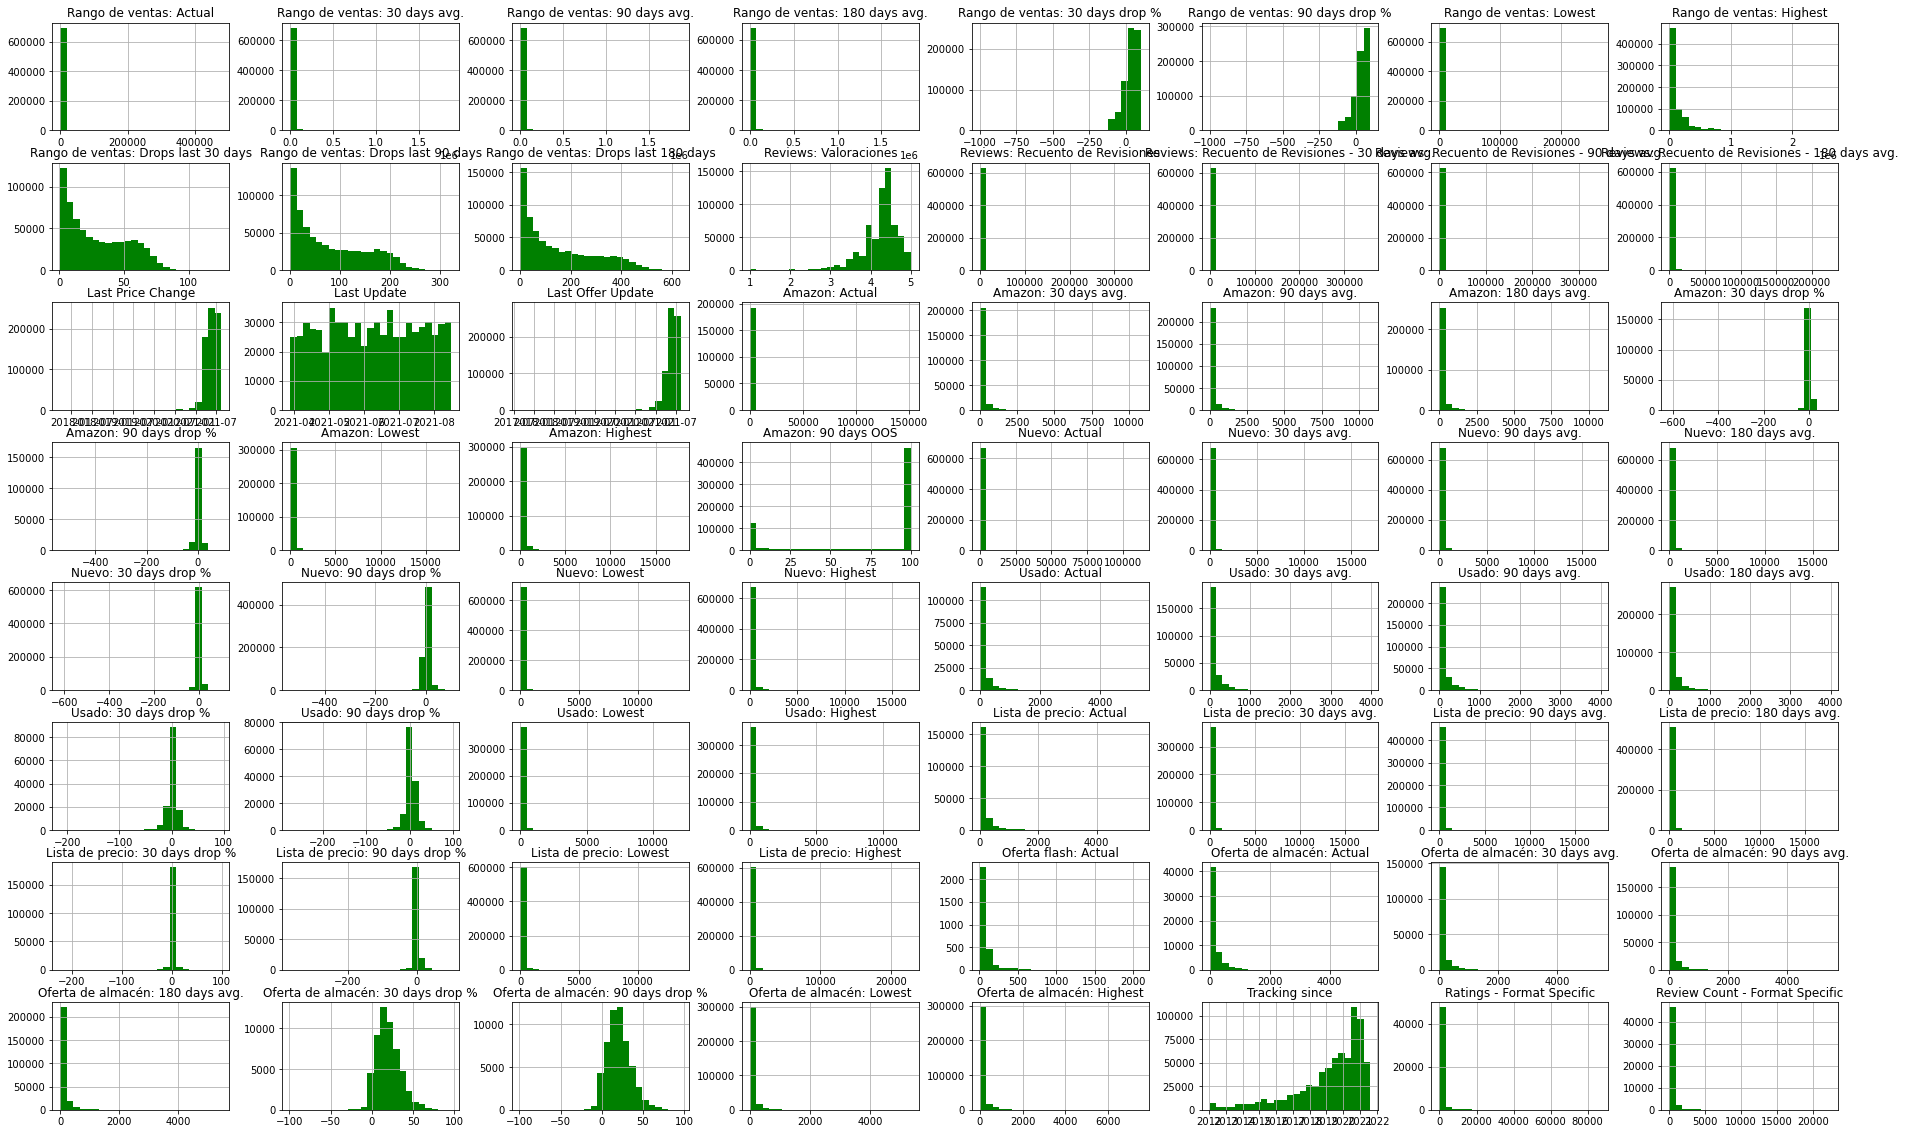

In [24]:
df.hist(figsize=(32,20), bins=25, color="g")
plt.show()

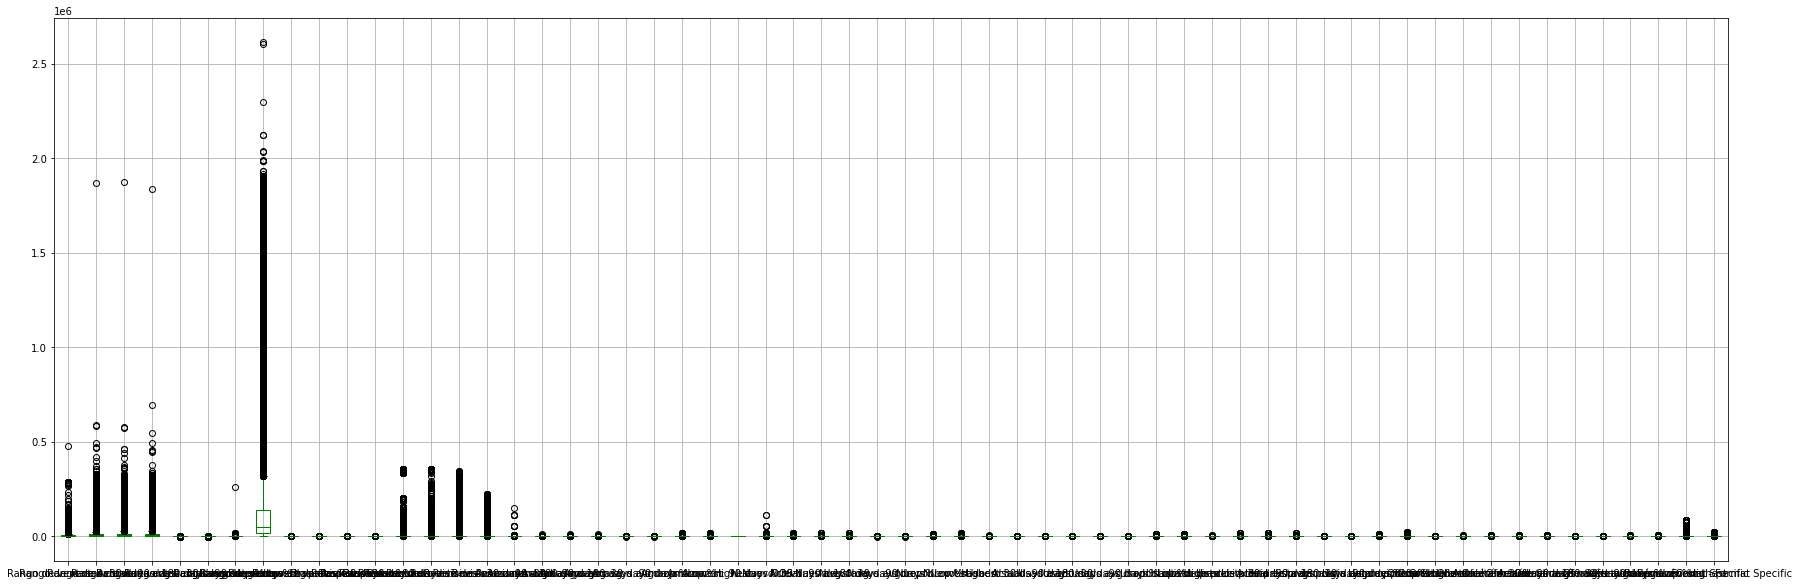

In [25]:
df.boxplot(figsize=(30,10), color="g")
plt.show()

In [26]:
#me quedo con las variables que me interesan para el bucle
var_num = df.select_dtypes(include='number').copy()

In [27]:
#lo mismo con las variables categóricas, ya que luego las necesitaré
var_cat = df.select_dtypes(exclude='number').copy()

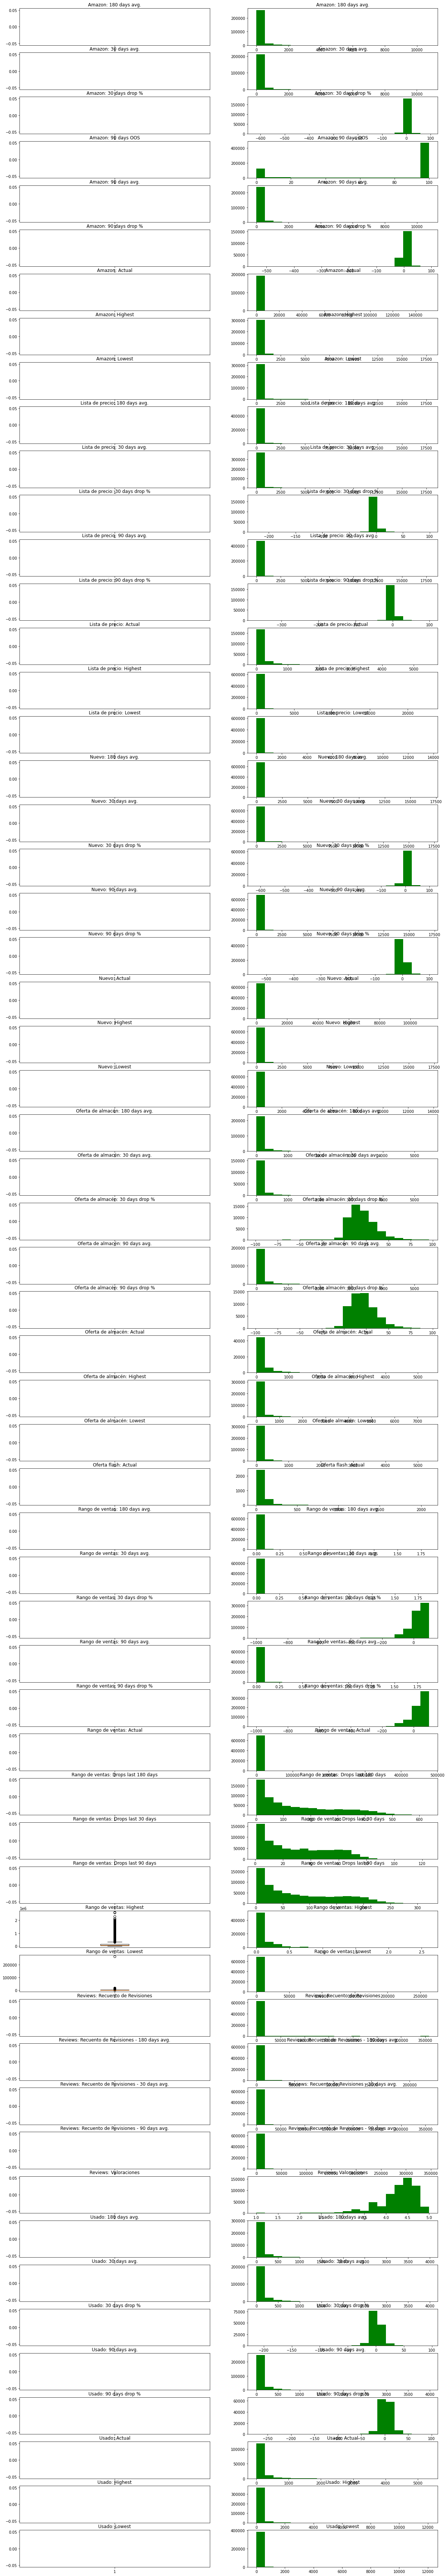

In [28]:
num_var_a_graficar = 58

plt.figure(figsize=(20,130))
for i, var in enumerate(np.sort(var_num.columns[:num_var_a_graficar])):
    plt.subplot(var_num.columns.shape[0],2,2*i+1)
    plt.boxplot(var_num[var], vert=True) # COMPLETAR para pintar boxplot
    plt.xlabel('')
    plt.title(var)
    plt.subplot(var_num.columns.shape[0],2,2*i+2)
    plt.hist(var_num[var], bins=20, color="g")# COMPLETAR pintar histograma
    plt.xlabel('')
    plt.title(var)

##  Valores ausentes

In [29]:
df_nulos = pd.DataFrame(df.isnull().sum(), columns=['Nan'])  #lo he cambiado por df_const

In [30]:
df_nulos.loc[df_nulos['Nan']>19000]

,Nan
Reviews: Valoraciones,58505
Reviews: Recuento de Revisiones,58500
Reviews: Recuento de Revisiones - 30 days avg.,58602
Reviews: Recuento de Revisiones - 90 days avg.,58602
Reviews: Recuento de Revisiones - 180 days avg.,58602
Amazon: Actual,502549
Amazon: 30 days avg.,469921
Amazon: 90 days avg.,442444
Amazon: 180 days avg.,419674
Amazon: 30 days drop %,502549


Definimos la función my_missing para calcular el numero de valores ausentes 

In [31]:
def my_missing(df):
    print("Número de registros:", len(df))
    aux = df.isna().sum()
    display(aux[aux>0])
    print("En porcentaje:")
    display(100*aux[aux>0] / len(df))

In [32]:
my_missing(df)

Número de registros: 694882


Imagen                                                137
Rango de ventas: Actual                               312
Rango de ventas: 30 days avg.                         695
Rango de ventas: 90 days avg.                         690
Rango de ventas: 180 days avg.                        681
Rango de ventas: 30 days drop %                       312
Rango de ventas: 90 days drop %                       312
Rango de ventas: Drops last 30 days                  9824
Rango de ventas: Drops last 90 days                  6654
Rango de ventas: Drops last 180 days                 5748
Rango de ventas: Reference                            317
Rango de ventas: Subcategory Sales Ranks             2331
Reviews: Valoraciones                               58505
Reviews: Recuento de Revisiones                     58500
Reviews: Recuento de Revisiones - 30 days avg.      58602
Reviews: Recuento de Revisiones - 90 days avg.      58602
Reviews: Recuento de Revisiones - 180 days avg.     58602
Last Offer Upd

En porcentaje:


Imagen                                              0.019716
Rango de ventas: Actual                             0.044900
Rango de ventas: 30 days avg.                       0.100017
Rango de ventas: 90 days avg.                       0.099297
Rango de ventas: 180 days avg.                      0.098002
Rango de ventas: 30 days drop %                     0.044900
Rango de ventas: 90 days drop %                     0.044900
Rango de ventas: Drops last 30 days                 1.413765
Rango de ventas: Drops last 90 days                 0.957573
Rango de ventas: Drops last 180 days                0.827191
Rango de ventas: Reference                          0.045619
Rango de ventas: Subcategory Sales Ranks            0.335453
Reviews: Valoraciones                               8.419415
Reviews: Recuento de Revisiones                     8.418696
Reviews: Recuento de Revisiones - 30 days avg.      8.433374
Reviews: Recuento de Revisiones - 90 days avg.      8.433374
Reviews: Recuento de Rev

En principio decidimos que si existe una perdida de valores mayor al 5%, optamos por eliminarlos directamente. Pero debido a la existencia de variables que influyen directamente en el target (Ej. Oferta Flash) decidimos no eliminarlas a no ser que no aportasen valor.

## Análisis de variables / Transformación de Variables por nulos


### Grupo de Variables: Rango de ventas

**NOTA**: Analizar un producto en concreto o hacer agrupaciones por subcategoría

In [33]:
cols_rango = ['Rango de ventas: Actual','Rango de ventas: 30 days avg.','Rango de ventas: 90 days avg.','Rango de ventas: 180 days avg.']

In [34]:
df[cols_rango].head()

,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.
0,3.0,34.0,34.0,34.0
1,6.0,809.0,569.0,1919.0
2,7.0,5.0,95.0,146.0
3,8.0,11.0,15.0,58.0
4,9.0,9.0,10.0,12.0


In [35]:
print('-------VALORES NULOS--------')
my_missing(df[cols_rango])

-------VALORES NULOS--------
Número de registros: 694882


Rango de ventas: Actual           312
Rango de ventas: 30 days avg.     695
Rango de ventas: 90 days avg.     690
Rango de ventas: 180 days avg.    681
dtype: int64

En porcentaje:


Rango de ventas: Actual           0.044900
Rango de ventas: 30 days avg.     0.100017
Rango de ventas: 90 days avg.     0.099297
Rango de ventas: 180 days avg.    0.098002
dtype: float64

**Imputación de nulos**

Reemplazamos los valores nulos por la media por categoría.

Creo un dataframe nuevo con la media de valores de rangos de venta por categoria:

In [36]:
df_aux = pd.DataFrame(df.groupby('Category').mean()[cols_rango])
df_aux.head()

,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.
Category,,,,
Acampada y senderismo,6292.100000,45696.500000,46282.000000,56052.500000
Accesorios de alimentación,4293.164352,13747.549459,14287.787481,14396.530912
Accesorios de audio y vídeo portátil,4763.666667,4732.666667,4732.666667,4732.666667
Accesorios de foto y vídeo para teléfonos móviles,1063.571429,973.428571,954.000000,984.142857
Accesorios de herramientas eléctricas,8609.000000,33058.000000,36651.000000,36536.000000


In [37]:
df.shape

(694882, 81)

In [38]:
colnames = df_aux.columns

In [39]:
print(len(df['Rango de ventas: Actual']))
print(len(df['Rango de ventas: 30 days avg.']))

694882
694882


Realizo un match entre el dataframe auxiliar anterior y el df inicial donde existan valores nulos. Este procediemiento se realiza a través de varios merges.

In [40]:
df2 =pd.DataFrame()
lon_df = []

for i, col in enumerate(colnames):
        print(col,i)
        
        df_aux2 = pd.merge(df[df[col].isnull()],df_aux[col], how='inner', left_on='Category', right_index=True).rename(columns = {f'{col}_x': col, f'{col}_y': f'{col}_mean_cat'})
        df_aux3 = pd.merge(df[~df[col].isnull()], df[col], how='inner', left_index=True, right_index=True).rename(columns = {f'{col}_x': col, f'{col}_y': f'{col}_mean_cat'})

        df_join = df_aux2.append(df_aux3)
        lon_df.append(len(df_join))
        
        df2 = df2.append(df_join)

Rango de ventas: Actual 0
Rango de ventas: 30 days avg. 1
Rango de ventas: 90 days avg. 2
Rango de ventas: 180 days avg. 3


In [41]:
# Longitud de cada dataframe
lon_df

[694882, 694882, 694882, 694882]

Como la imputación es de cuatro columnas, he agrupado los cuatro dataframe en uno, procedemos a separarlo:

In [42]:
# Cortes del dataframe
cut_1 = lon_df[0]
cut_2 = cut_1 + lon_df[1]
cut_3 = cut_2 + lon_df[2]

In [43]:
df_cut1 = df2.iloc[:cut_1]['Rango de ventas: Actual_mean_cat']
df_cut2 = df2.iloc[cut_1:cut_2]['Rango de ventas: 30 days avg._mean_cat']
df_cut3 = df2.iloc[cut_2:cut_3]['Rango de ventas: 90 days avg._mean_cat']
df_cut4 = df2.iloc[cut_3:]['Rango de ventas: 180 days avg._mean_cat']

In [44]:
# Creo las nuevas columnas con los datos reemplazados
df['Rango de ventas: Actual_mean_cat'] = df_cut1
df['Rango de ventas: 30 days avg._mean_cat'] = df_cut2
df['Rango de ventas: 90 days avg._mean_cat'] = df_cut3
df['Rango de ventas: 180 days avg._mean_cat'] = df_cut4

In [45]:
# Elimino columnas residuales procedentes de los merge y renombro columnas
df.drop(columns = ['Rango de ventas: Actual', 'Rango de ventas: 30 days avg.', 'Rango de ventas: 90 days avg.', 'Rango de ventas: 180 days avg.'], inplace = True)
df.rename(columns = {'Rango de ventas: Actual_mean_cat':'Rango de ventas: Actual', 'Rango de ventas: 30 days avg._mean_cat': 'Rango de ventas: 30 days avg.',
                     'Rango de ventas: 90 days avg._mean_cat':'Rango de ventas: 90 days avg.', 'Rango de ventas: 180 days avg._mean_cat': 'Rango de ventas: 180 days avg.'},
                     inplace = True)
df[colnames].isnull().sum()

Rango de ventas: Actual           4
Rango de ventas: 30 days avg.     8
Rango de ventas: 90 days avg.     8
Rango de ventas: 180 days avg.    8
dtype: int64

Todavía existen nulos debido a que ciertas categorías no tenía datos, además ciertos productos no tenían ninguna categoría asignada. Sustituimos dicho valores por la mediana.

In [46]:
df = df.merge(df[colnames].fillna(df[colnames].median(axis = 0)), how = 'inner', left_index=True, right_index=True)
df.drop(columns = ['Rango de ventas: Actual_x', 'Rango de ventas: 30 days avg._x', 'Rango de ventas: 90 days avg._x', 'Rango de ventas: 180 days avg._x'], inplace = True)
df.rename(columns = {'Rango de ventas: Actual_y':'Rango de ventas: Actual', 'Rango de ventas: 30 days avg._y': 'Rango de ventas: 30 days avg.',
                     'Rango de ventas: 90 days avg._y':'Rango de ventas: 90 days avg.', 'Rango de ventas: 180 days avg._y': 'Rango de ventas: 180 days avg.'},
                     inplace = True)
df[colnames].isnull().sum()

Rango de ventas: Actual           0
Rango de ventas: 30 days avg.     0
Rango de ventas: 90 days avg.     0
Rango de ventas: 180 days avg.    0
dtype: int64

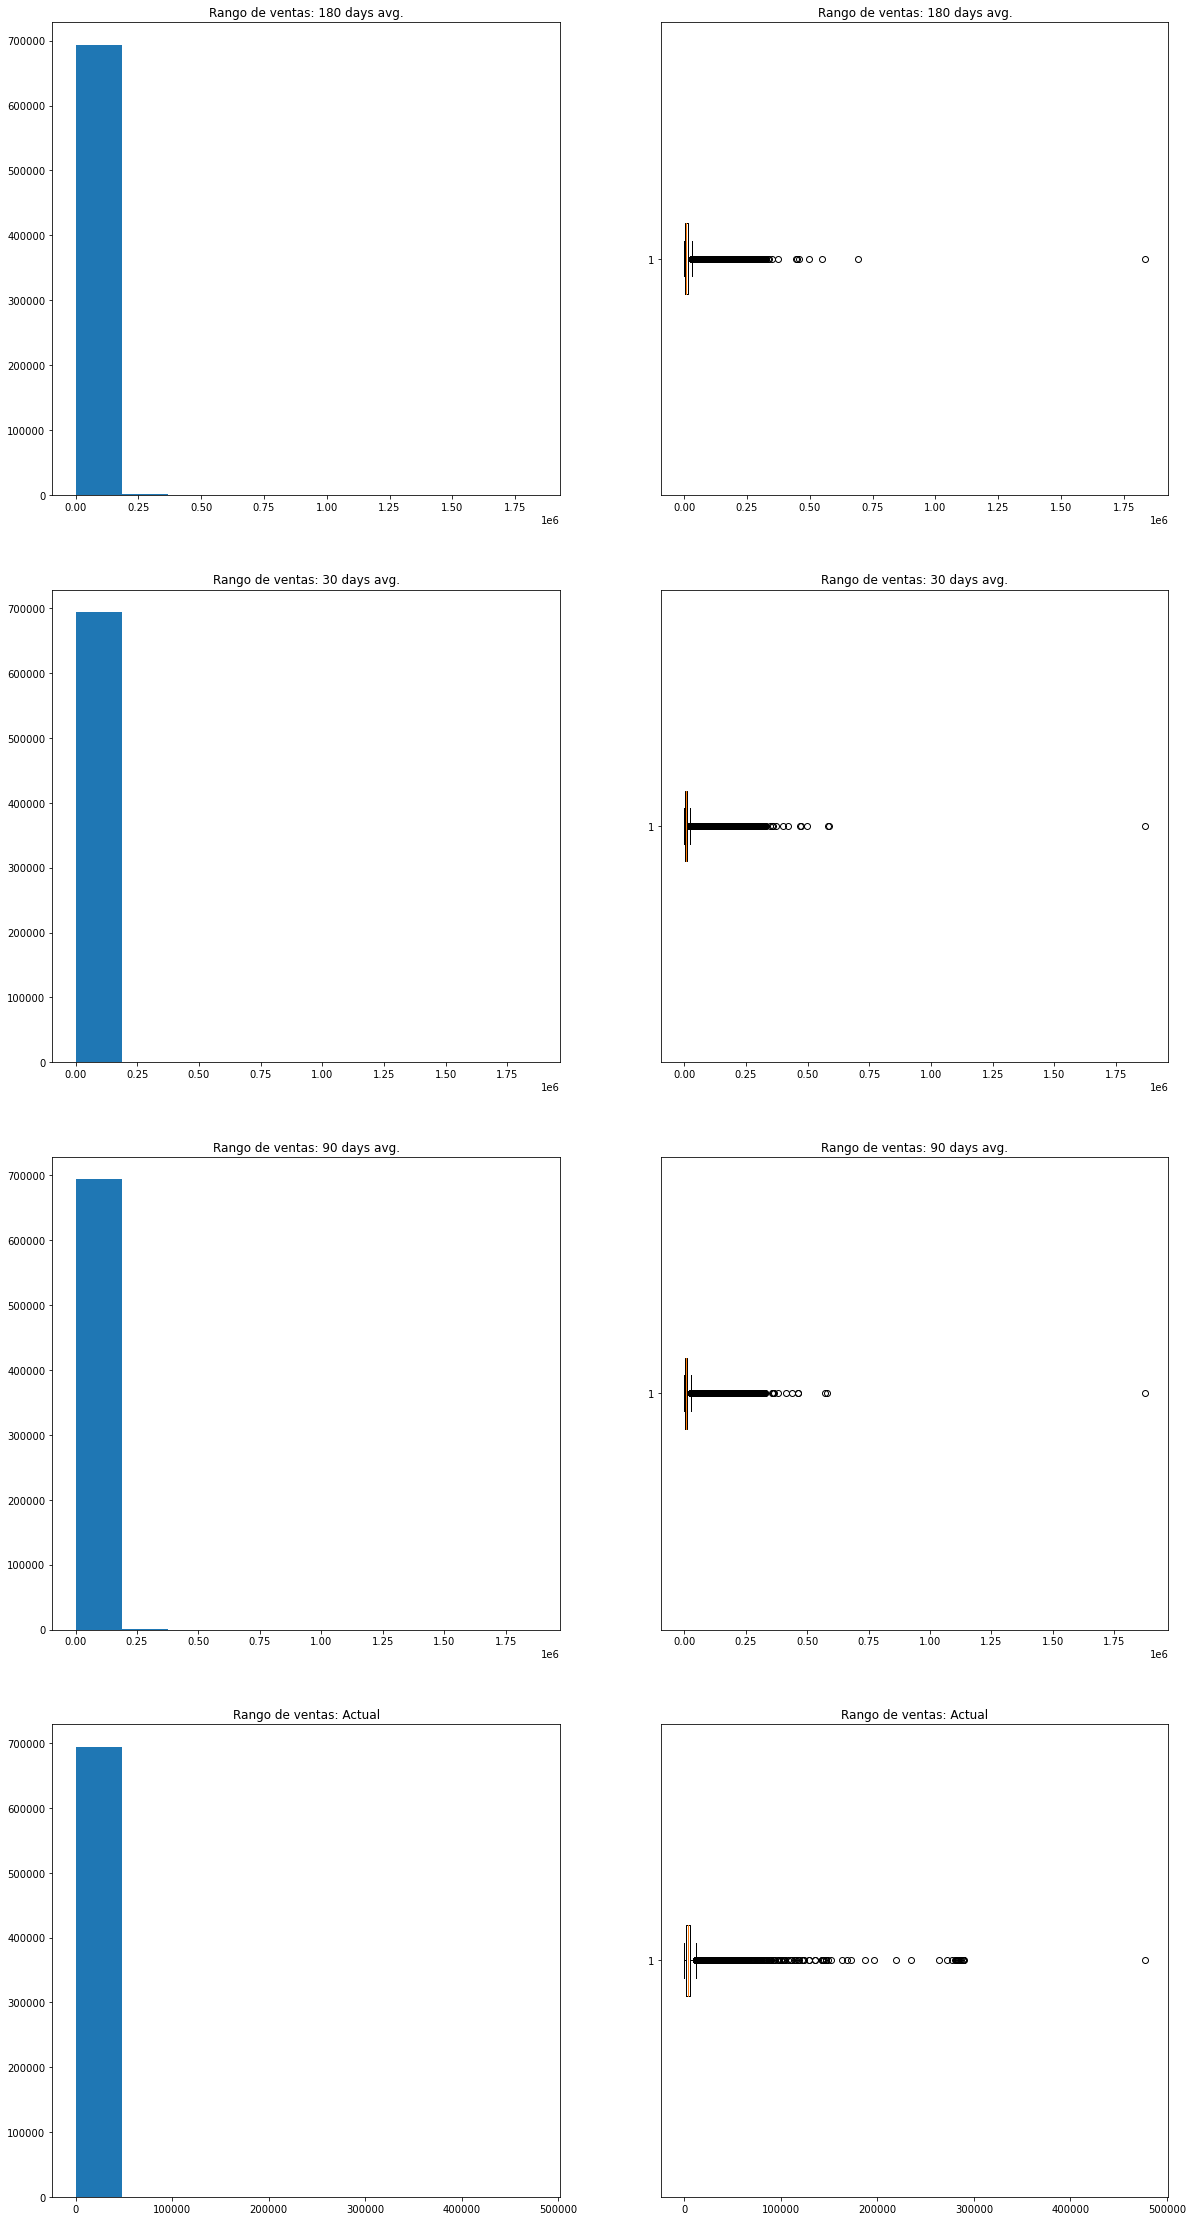

In [47]:
plt.figure(figsize=(20,40))
for i, var in enumerate(np.sort(df[colnames].describe().columns)):
    plt.subplot(df[colnames].columns.shape[0],2,2*i+1)
    plt.hist(df[colnames][var], bins = 10)
    plt.xlabel('')
    plt.title(var)
    plt.subplot(df[colnames].columns.shape[0],2,2*i+2)
    plt.boxplot(df[colnames][var], vert=False)
    plt.xlabel('')
    plt.title(var)

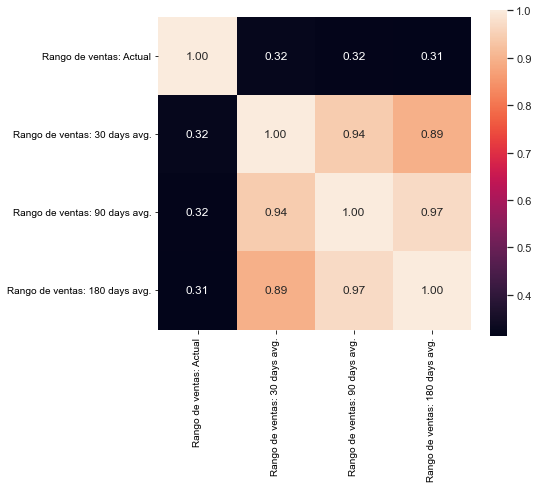

In [48]:
cm = df[colnames].corr()
f, ax = plt.subplots(figsize=(7, 6))
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f')
plt.show()

In [49]:
df[['Rango de ventas: Lowest', 'Rango de ventas: Highest']].isnull().sum()

Rango de ventas: Lowest     0
Rango de ventas: Highest    0
dtype: int64

### Grupo de Variables: Reviews

Contiene información acerca de las reviews de los clientes para cada prodcuto.

In [50]:
df.head(2)

,Imagen,Título,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,Last Price Change,Last Update,Last Offer Update,Amazon: Actual,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: 30 days drop %,Amazon: 90 days drop %,Amazon: Lowest,Amazon: Highest,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Nuevo: Actual,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Nuevo: Lowest,Nuevo: Highest,Usado: Actual,Usado: 30 days avg.,Usado: 90 days avg.,Usado: 180 days avg.,Usado: 30 days drop %,Usado: 90 days drop %,Usado: Lowest,Usado: Highest,Lista de precio: Actual,Lista de precio: 30 days avg.,Lista de precio: 90 days avg.,Lista de precio: 180 days avg.,Lista de precio: 30 days drop %,Lista de precio: 90 days drop %,Lista de precio: Lowest,Lista de precio: Highest,Oferta flash: Actual,Oferta flash: Upcoming Deal,Oferta de almacén: Actual,Oferta de almacén: 30 days avg.,Oferta de almacén: 90 days avg.,Oferta de almacén: 180 days avg.,Oferta de almacén: 30 days drop %,Oferta de almacén: 90 days drop %,Oferta de almacén: Lowest,Oferta de almacén: Highest,Tracking since,ASIN,Brand,Product Group,Prime Eligible (Amazon offer),Fecha,Variation Attributes,Nuevo: 90 days OOS,Usado: 90 days OOS,Ratings - Format Specific,Review Count - Format Specific,Prime Eligible (Buy Box),Caja de Compra (Buy Box) 🚚: 90 days OOS,Category,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.
0,https://images-na.ssl-images-amazon.com/images...,Poco X3 Pro Smartphone RAM 6GB ROM 128GB 120Hz...,91.0,91.0,3,473,8.0,8.0,8.0,Electrónica,# 1 | Top 1% | Móviles y smartphones libres,2.5,2.0,1.0,1.0,1.0,2021-03-29 01:02:00,2021-03-29 20:48:00,2021-03-29 10:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,no Amazon offer exists,199.0,206.19,206.19,206.19,3.0,3.0,199.0,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,249.00,249.00,249.00,0.0,0.0,249.0,249.0,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-16,B08YJFSHFM,Xiaomi,Electrónica,no,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,3.0,34.0,34.0,34.0
1,https://images-na.ssl-images-amazon.com/images...,"SAMSUNG Galaxy M11 | Smartphone Dual SIM, Pant...",99.0,99.0,6,24696,68.0,208.0,319.0,Electrónica,# 2 | Top 1% | Móviles y smartphones libres,4.5,1421.0,1262.0,923.0,600.0,2021-03-29 19:28:00,2021-03-29 20:56:00,2021-03-29 19:28:00,99.0,140.37,146.35,148.92,29.0,32.0,99.0,179.0,33.0,Amazon offer is in stock and shippable,99.0,138.22,145.32,145.37,28.0,32.0,99.0,169.0,92.07,123.14,125.23,127.13,25.0,26.0,87.12,143.44,159.9,159.96,169.92,170.66,0.0,6.0,145.0,179.0,NaN,no,92.07,124.27,125.81,127.65,34.0,37.0,87.12,143.44,2020-11-02,B08J7T7K26,SAMSUNG,Wireless,yes,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,6.0,809.0,569.0,1919.0


In [51]:
cols_reviews = ['Reviews: Valoraciones','Reviews: Recuento de Revisiones','Reviews: Recuento de Revisiones - 30 days avg.','Reviews: Recuento de Revisiones - 90 days avg.',
                'Reviews: Recuento de Revisiones - 180 days avg.']

In [52]:
cols_reviews

['Reviews: Valoraciones',
 'Reviews: Recuento de Revisiones',
 'Reviews: Recuento de Revisiones - 30 days avg.',
 'Reviews: Recuento de Revisiones - 90 days avg.',
 'Reviews: Recuento de Revisiones - 180 days avg.']

In [53]:
df[cols_reviews].sample(4)

,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.
278605,5.0,3.0,3.0,3.0,2.0
117095,4.5,34.0,12.0,12.0,12.0
480329,4.1,837.0,828.0,802.0,773.0
125934,4.6,786.0,756.0,697.0,558.0


In [54]:
print('-------VALORES NULOS--------')
my_missing(df[cols_reviews])

-------VALORES NULOS--------
Número de registros: 694882


Reviews: Valoraciones                              58505
Reviews: Recuento de Revisiones                    58500
Reviews: Recuento de Revisiones - 30 days avg.     58602
Reviews: Recuento de Revisiones - 90 days avg.     58602
Reviews: Recuento de Revisiones - 180 days avg.    58602
dtype: int64

En porcentaje:


Reviews: Valoraciones                              8.419415
Reviews: Recuento de Revisiones                    8.418696
Reviews: Recuento de Revisiones - 30 days avg.     8.433374
Reviews: Recuento de Revisiones - 90 days avg.     8.433374
Reviews: Recuento de Revisiones - 180 days avg.    8.433374
dtype: float64

**Imputación de nulos**

Creo un dataframe nuevo con la media de valores de reviews por categoria:

In [55]:
df_aux = pd.DataFrame(df.groupby('Category').mean()[cols_reviews])
df_aux.head()

,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.
Category,,,,,
Acampada y senderismo,4.488889,377.000000,371.666667,361.444444,339.777778
Accesorios de alimentación,4.190861,222.847979,213.479789,220.667838,212.464851
Accesorios de audio y vídeo portátil,NaN,NaN,NaN,NaN,NaN
Accesorios de foto y vídeo para teléfonos móviles,4.475000,336.750000,293.000000,226.875000,196.500000
Accesorios de herramientas eléctricas,4.600000,49.000000,21.000000,22.000000,19.000000


Realizo un match entre el dataframe auxiliar anterior y el df inicial donde existan valores nulos. Este procediemiento se realiza a través de varios merges.

In [56]:
df2 =pd.DataFrame()
lon_df = []

for i, col in enumerate(cols_reviews):
        print(col,i)
        
#         df_aux2 = pd.merge(df[df[col].isnull()],df_aux[col], how='inner', left_on='Category', right_index=True).rename(columns = {f'{col}_x': col, f'{col}_y': f'{col}_mean_cat'})
        df_aux2 = pd.merge(df[df[col].isnull()],df_aux[col], how='inner', left_on = 'Category', right_index=True).rename(columns = {f'{col}_x': col, f'{col}_y': f'{col}_mean_cat'})

        df_aux3 = pd.merge(df[~df[col].isnull()], df[col], how='inner', left_index=True, right_index=True).rename(columns = {f'{col}_x': col, f'{col}_y': f'{col}_mean_cat'})
        
        df_join = df_aux2.append(df_aux3)
        lon_df.append(len(df_join))
        
        df2 = df2.append(df_join)

Reviews: Valoraciones 0
Reviews: Recuento de Revisiones 1
Reviews: Recuento de Revisiones - 30 days avg. 2
Reviews: Recuento de Revisiones - 90 days avg. 3
Reviews: Recuento de Revisiones - 180 days avg. 4


In [57]:
# Longitud de cada dataframe
lon_df

[694882, 694882, 694882, 694882, 694882]

In [58]:
# Cortes del dataframe
cut_1 = lon_df[0]
cut_2 = cut_1 + lon_df[1]
cut_3 = cut_2 + lon_df[2]
cut_4 = cut_3 + lon_df[3]

Como la imputación es de cuatro columnas, he agrupado los cuatro dataframe en uno, procedemos a separarlo:

In [59]:
df_cut1 = df2.iloc[:cut_1]['Reviews: Valoraciones_mean_cat']
df_cut2 = df2.iloc[cut_1:cut_2]['Reviews: Recuento de Revisiones_mean_cat']
df_cut3 = df2.iloc[cut_2:cut_3]['Reviews: Recuento de Revisiones - 30 days avg._mean_cat']
df_cut4 = df2.iloc[cut_3:cut_4]['Reviews: Recuento de Revisiones - 90 days avg._mean_cat']
df_cut5 = df2.iloc[cut_4:]['Reviews: Recuento de Revisiones - 180 days avg._mean_cat']

In [60]:
df.head(2)

,Imagen,Título,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,Last Price Change,Last Update,Last Offer Update,Amazon: Actual,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: 30 days drop %,Amazon: 90 days drop %,Amazon: Lowest,Amazon: Highest,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Nuevo: Actual,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Nuevo: Lowest,Nuevo: Highest,Usado: Actual,Usado: 30 days avg.,Usado: 90 days avg.,Usado: 180 days avg.,Usado: 30 days drop %,Usado: 90 days drop %,Usado: Lowest,Usado: Highest,Lista de precio: Actual,Lista de precio: 30 days avg.,Lista de precio: 90 days avg.,Lista de precio: 180 days avg.,Lista de precio: 30 days drop %,Lista de precio: 90 days drop %,Lista de precio: Lowest,Lista de precio: Highest,Oferta flash: Actual,Oferta flash: Upcoming Deal,Oferta de almacén: Actual,Oferta de almacén: 30 days avg.,Oferta de almacén: 90 days avg.,Oferta de almacén: 180 days avg.,Oferta de almacén: 30 days drop %,Oferta de almacén: 90 days drop %,Oferta de almacén: Lowest,Oferta de almacén: Highest,Tracking since,ASIN,Brand,Product Group,Prime Eligible (Amazon offer),Fecha,Variation Attributes,Nuevo: 90 days OOS,Usado: 90 days OOS,Ratings - Format Specific,Review Count - Format Specific,Prime Eligible (Buy Box),Caja de Compra (Buy Box) 🚚: 90 days OOS,Category,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.
0,https://images-na.ssl-images-amazon.com/images...,Poco X3 Pro Smartphone RAM 6GB ROM 128GB 120Hz...,91.0,91.0,3,473,8.0,8.0,8.0,Electrónica,# 1 | Top 1% | Móviles y smartphones libres,2.5,2.0,1.0,1.0,1.0,2021-03-29 01:02:00,2021-03-29 20:48:00,2021-03-29 10:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,no Amazon offer exists,199.0,206.19,206.19,206.19,3.0,3.0,199.0,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249.0,249.00,249.00,249.00,0.0,0.0,249.0,249.0,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-16,B08YJFSHFM,Xiaomi,Electrónica,no,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,3.0,34.0,34.0,34.0
1,https://images-na.ssl-images-amazon.com/images...,"SAMSUNG Galaxy M11 | Smartphone Dual SIM, Pant...",99.0,99.0,6,24696,68.0,208.0,319.0,Electrónica,# 2 | Top 1% | Móviles y smartphones libres,4.5,1421.0,1262.0,923.0,600.0,2021-03-29 19:28:00,2021-03-29 20:56:00,2021-03-29 19:28:00,99.0,140.37,146.35,148.92,29.0,32.0,99.0,179.0,33.0,Amazon offer is in stock and shippable,99.0,138.22,145.32,145.37,28.0,32.0,99.0,169.0,92.07,123.14,125.23,127.13,25.0,26.0,87.12,143.44,159.9,159.96,169.92,170.66,0.0,6.0,145.0,179.0,NaN,no,92.07,124.27,125.81,127.65,34.0,37.0,87.12,143.44,2020-11-02,B08J7T7K26,SAMSUNG,Wireless,yes,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,6.0,809.0,569.0,1919.0


In [61]:
# Creo las nuevas columnas con los datos reemplazados
df['Reviews: Valoraciones_mean_cat'] = df_cut1
df['Reviews: Recuento de Revisiones_mean_cat'] = df_cut2
df['Reviews: Recuento de Revisiones - 30 days avg._mean_cat'] = df_cut3
df['Reviews: Recuento de Revisiones - 90 days avg._mean_cat'] = df_cut4
df['Reviews: Recuento de Revisiones - 180 days avg._mean_cat'] = df_cut5

In [62]:
# Elimino columnas residuales procedentes de los merge y renombro columnas
df.drop(columns = ['Reviews: Valoraciones', 'Reviews: Recuento de Revisiones', 'Reviews: Recuento de Revisiones - 30 days avg.',
                   'Reviews: Recuento de Revisiones - 90 days avg.', 'Reviews: Recuento de Revisiones - 180 days avg.'], inplace = True)
df.rename(columns = {'Reviews: Valoraciones_mean_cat':'Reviews: Valoraciones', 'Reviews: Recuento de Revisiones_mean_cat': 'Reviews: Recuento de Revisiones',
                     'Reviews: Recuento de Revisiones - 30 days avg._mean_cat':'Reviews: Recuento de Revisiones - 30 days avg.', 'Reviews: Recuento de Revisiones - 90 days avg._mean_cat': 'Reviews: Recuento de Revisiones - 90 days avg.',
                     'Reviews: Recuento de Revisiones - 180 days avg._mean_cat': 'Reviews: Recuento de Revisiones - 180 days avg.'},
                     inplace = True)
df[cols_reviews].isnull().sum()

Reviews: Valoraciones                              192
Reviews: Recuento de Revisiones                    192
Reviews: Recuento de Revisiones - 30 days avg.     192
Reviews: Recuento de Revisiones - 90 days avg.     192
Reviews: Recuento de Revisiones - 180 days avg.    192
dtype: int64

Todavía existen nulos debido a que ciertas categorías no tenía datos, además ciertos productos no tenían ninguna categoría asignada. Sustituimos dicho valores por la mediana.

In [63]:
df = df.merge(df[cols_reviews].fillna(df[cols_reviews].median(axis = 0)), how = 'inner', left_index=True, right_index=True)
df.drop(columns = ['Reviews: Valoraciones_x', 'Reviews: Recuento de Revisiones_x', 'Reviews: Recuento de Revisiones - 30 days avg._x', 
                   'Reviews: Recuento de Revisiones - 90 days avg._x', 'Reviews: Recuento de Revisiones - 180 days avg._x'], inplace = True)


df.rename(columns = {'Reviews: Valoraciones_y':'Reviews: Valoraciones', 'Reviews: Recuento de Revisiones_y': 'Reviews: Recuento de Revisiones', 'Reviews: Recuento de Revisiones - 30 days avg._y':'Reviews: Recuento de Revisiones - 30 days avg.',
                     'Reviews: Recuento de Revisiones - 90 days avg._y':'Reviews: Recuento de Revisiones - 90 days avg.', 'Reviews: Recuento de Revisiones - 180 days avg._y': 'Reviews: Recuento de Revisiones - 180 days avg.'},inplace = True)
df[cols_reviews].isnull().sum()

Reviews: Valoraciones                              0
Reviews: Recuento de Revisiones                    0
Reviews: Recuento de Revisiones - 30 days avg.     0
Reviews: Recuento de Revisiones - 90 days avg.     0
Reviews: Recuento de Revisiones - 180 days avg.    0
dtype: int64

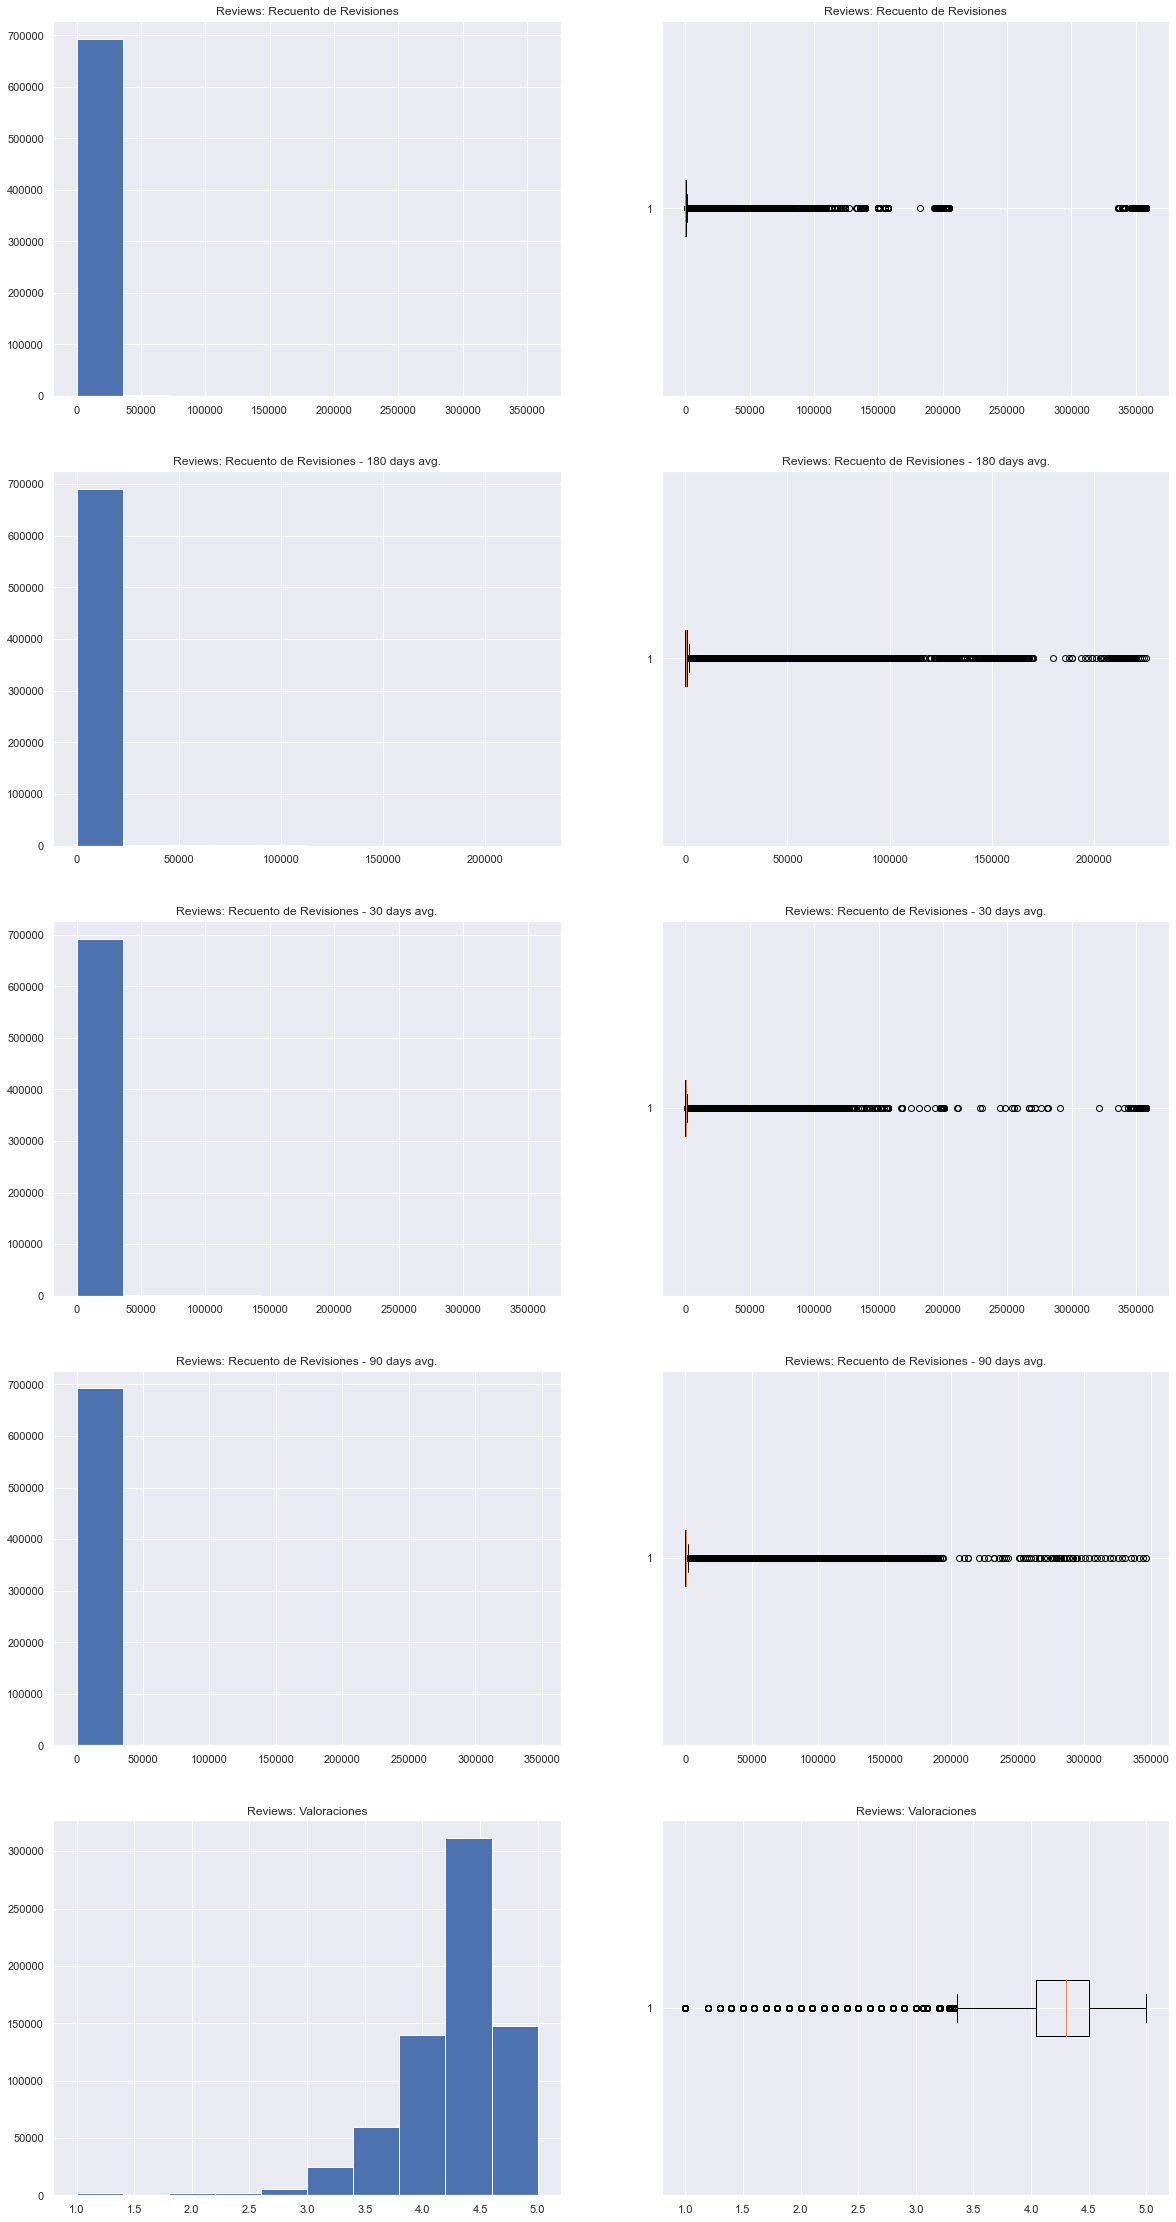

In [64]:
plt.figure(figsize=(20,40))
for i, var in enumerate(np.sort(df[cols_reviews].describe().columns)):
    plt.subplot(df[cols_reviews].columns.shape[0],2,2*i+1)
    plt.hist(df[cols_reviews][var], bins = 10)
    plt.xlabel('')
    plt.title(var)
    plt.subplot(df[cols_reviews].columns.shape[0],2,2*i+2)
    plt.boxplot(df[cols_reviews][var], vert=False)
    plt.xlabel('')
    plt.title(var)

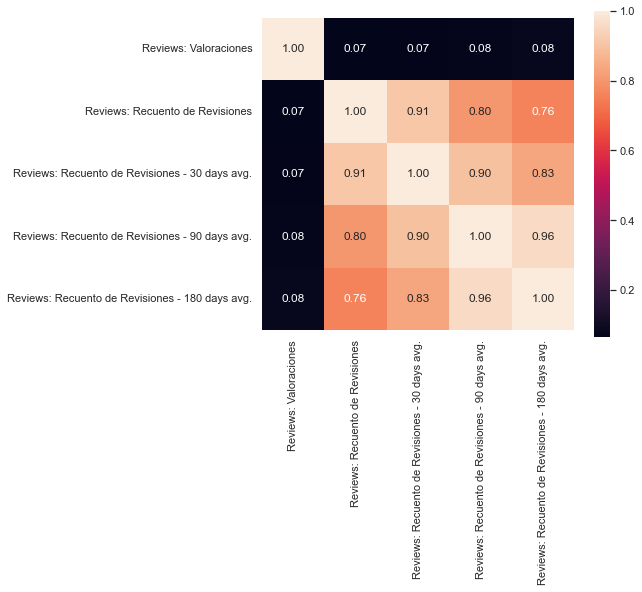

In [65]:
cm = df[cols_reviews].corr()
f, ax = plt.subplots(figsize=(7, 6))
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f')
plt.show()

## Usado: Actual

Esta variable hace referencia a los productos de segunda mano.

In [66]:
usado_actual_cols = ['Usado: Actual', 'Usado: 30 days avg.','Usado: 90 days avg.','Usado: 180 days avg.','Usado: 30 days drop %','Usado: 90 days drop %','Usado: Lowest','Usado: Highest']

In [67]:
my_missing(df[usado_actual_cols])

Número de registros: 694882


Usado: Actual            559038
Usado: 30 days avg.      456429
Usado: 90 days avg.      403706
Usado: 180 days avg.     364513
Usado: 30 days drop %    559038
Usado: 90 days drop %    559038
Usado: Lowest            309523
Usado: Highest           309523
dtype: int64

En porcentaje:


Usado: Actual            80.450782
Usado: 30 days avg.      65.684390
Usado: 90 days avg.      58.097058
Usado: 180 days avg.     52.456820
Usado: 30 days drop %    80.450782
Usado: 90 days drop %    80.450782
Usado: Lowest            44.543246
Usado: Highest           44.543246
dtype: float64

Vemos que este conjunto de variables posee muchos valores missing. Entendemos que la variable no aporta un valor de cara al modelo y a la predicción ya que poseemos otras variables más relacionadas con el target. Para no perder toda la información categorizamos la variable para no perder todo la información.

In [68]:
usado = pd.DataFrame(df['Usado: Actual'])
usado = usado.replace( [np.nan, 0.00], 0)
usado.values[usado != 0] = 1

usado = usado.rename(columns={'Usado: Actual': 'usado'})
df = pd.concat([df,usado], axis=1)

df.drop(['Usado: Actual', 'Usado: 30 days avg.','Usado: 90 days avg.','Usado: 180 days avg.','Usado: 30 days drop %','Usado: 90 days drop %','Usado: Lowest','Usado: Highest'], axis = 'columns', inplace=True)

In [69]:
df.head()

,Imagen,Título,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Last Price Change,Last Update,Last Offer Update,Amazon: Actual,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: 30 days drop %,Amazon: 90 days drop %,Amazon: Lowest,Amazon: Highest,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Nuevo: Actual,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Nuevo: Lowest,Nuevo: Highest,Lista de precio: Actual,Lista de precio: 30 days avg.,Lista de precio: 90 days avg.,Lista de precio: 180 days avg.,Lista de precio: 30 days drop %,Lista de precio: 90 days drop %,Lista de precio: Lowest,Lista de precio: Highest,Oferta flash: Actual,Oferta flash: Upcoming Deal,Oferta de almacén: Actual,Oferta de almacén: 30 days avg.,Oferta de almacén: 90 days avg.,Oferta de almacén: 180 days avg.,Oferta de almacén: 30 days drop %,Oferta de almacén: 90 days drop %,Oferta de almacén: Lowest,Oferta de almacén: Highest,Tracking since,ASIN,Brand,Product Group,Prime Eligible (Amazon offer),Fecha,Variation Attributes,Nuevo: 90 days OOS,Usado: 90 days OOS,Ratings - Format Specific,Review Count - Format Specific,Prime Eligible (Buy Box),Caja de Compra (Buy Box) 🚚: 90 days OOS,Category,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,usado
0,https://images-na.ssl-images-amazon.com/images...,Poco X3 Pro Smartphone RAM 6GB ROM 128GB 120Hz...,91.0,91.0,3,473,8.0,8.0,8.0,Electrónica,# 1 | Top 1% | Móviles y smartphones libres,2021-03-29 01:02:00,2021-03-29 20:48:00,2021-03-29 10:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,no Amazon offer exists,199.0,206.19,206.19,206.19,3.0,3.0,199.00,249.00,249.0,249.00,249.00,249.00,0.0,0.0,249.00,249.00,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-16,B08YJFSHFM,Xiaomi,Electrónica,no,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,3.0,34.0,34.0,34.0,2.5,2.0,1.0,1.0,1.0,0.0
1,https://images-na.ssl-images-amazon.com/images...,"SAMSUNG Galaxy M11 | Smartphone Dual SIM, Pant...",99.0,99.0,6,24696,68.0,208.0,319.0,Electrónica,# 2 | Top 1% | Móviles y smartphones libres,2021-03-29 19:28:00,2021-03-29 20:56:00,2021-03-29 19:28:00,99.00,140.37,146.35,148.92,29.0,32.0,99.00,179.00,33.0,Amazon offer is in stock and shippable,99.0,138.22,145.32,145.37,28.0,32.0,99.00,169.00,159.9,159.96,169.92,170.66,0.0,6.0,145.00,179.00,NaN,no,92.07,124.27,125.81,127.65,34.0,37.0,87.12,143.44,2020-11-02,B08J7T7K26,SAMSUNG,Wireless,yes,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,6.0,809.0,569.0,1919.0,4.5,1421.0,1262.0,923.0,600.0,1.0
2,https://images-na.ssl-images-amazon.com/images...,"Xiaomi Redmi 9 - Smartphone de 6.53"" FHD+, 4 G...",-40.0,93.0,4,2696,26.0,189.0,442.0,Electrónica,# 3 | Top 1% | Móviles y smartphones libres,2021-03-29 21:16:00,2021-03-29 21:16:00,2021-03-29 18:04:00,NaN,133.49,138.89,146.95,NaN,NaN,117.98,169.00,74.0,no Amazon offer exists,119.0,119.58,135.47,142.03,0.0,12.0,114.50,179.00,179.0,179.00,179.00,176.59,0.0,0.0,139.67,179.00,NaN,no,NaN,111.70,128.59,130.30,NaN,NaN,95.63,145.04,2020-06-12,B089WCSTLY,Xiaomi,Wireless,no,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,7.0,5.0,95.0,146.0,4.5,7386.0,6882.0,6115.0,4642.0,1.0
3,https://images-na.ssl-images-amazon.com/images...,"Gigaset A116 - Teléfono Inalámbrico, Agenda 50...",27.0,47.0,2,454556,42.0,166.0,382.0,Electrónica,# 1 | Top 1% | Teléfonos analógicos,2021-03-29 02:20:00,2021-03-29 18:26:00,2021-03-29 18:26:00,14.99,15.80,

### Nuevo: Actual

Indica el precio de venta ya sea distribuido por amazon o por terceros.

In [70]:
nuevo_actual_col = ['Nuevo: Actual', 'Nuevo: 30 days avg.', 'Nuevo: 90 days avg.', 'Nuevo: 180 days avg.',
                    'Nuevo: Lowest','Nuevo: Highest']

In [71]:
my_missing(df[nuevo_actual_col])

Número de registros: 694882


Nuevo: Actual           23420
Nuevo: 30 days avg.      4292
Nuevo: 90 days avg.      2669
Nuevo: 180 days avg.     1606
Nuevo: Lowest             137
Nuevo: Highest            137
dtype: int64

En porcentaje:


Nuevo: Actual           3.370356
Nuevo: 30 days avg.     0.617659
Nuevo: 90 days avg.     0.384094
Nuevo: 180 days avg.    0.231118
Nuevo: Lowest           0.019716
Nuevo: Highest          0.019716
dtype: float64

**Imputación de nulos**

In [72]:
df_aux = pd.DataFrame(df.groupby('Category').mean()[nuevo_actual_col])
df_aux.head()

,Nuevo: Actual,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: Lowest,Nuevo: Highest
Category,,,,,,
Acampada y senderismo,111.351000,109.699000,105.005000,101.496000,39.027000,146.423000
Accesorios de alimentación,16.234800,16.468650,16.466998,16.499853,13.078225,22.290077
Accesorios de audio y vídeo portátil,14.576667,14.576667,14.576667,14.576667,13.318333,15.785000
Accesorios de foto y vídeo para teléfonos móviles,123.133750,112.688750,108.088750,115.795000,89.000000,272.480000
Accesorios de herramientas eléctricas,3.990000,3.990000,3.860000,3.800000,1.650000,4.430000


In [73]:
df2 =pd.DataFrame()
lon_df = []

for i, col in enumerate(nuevo_actual_col):
        print(col,i)
        
#         df_aux2 = pd.merge(df[df[col].isnull()],df_aux[col], how='inner', left_on='Category', right_index=True).rename(columns = {f'{col}_x': col, f'{col}_y': f'{col}_mean_cat'})
        df_aux2 = pd.merge(df[df[col].isnull()],df_aux[col], how='inner', left_on = 'Category', right_index=True).rename(columns = {f'{col}_x': col, f'{col}_y': f'{col}_mean_cat'})

        df_aux3 = pd.merge(df[~df[col].isnull()], df[col], how='inner', left_index=True, right_index=True).rename(columns = {f'{col}_x': col, f'{col}_y': f'{col}_mean_cat'})
        
        df_join = df_aux2.append(df_aux3)
        lon_df.append(len(df_join))
        
        df2 = df2.append(df_join)

Nuevo: Actual 0
Nuevo: 30 days avg. 1
Nuevo: 90 days avg. 2
Nuevo: 180 days avg. 3
Nuevo: Lowest 4
Nuevo: Highest 5


In [74]:
# Longitud de cada dataframe
lon_df

[694882, 694882, 694882, 694882, 694882, 694882]

In [75]:
# Cortes del dataframe
cut_1 = lon_df[0]
cut_2 = cut_1 + lon_df[1]
cut_3 = cut_2 + lon_df[2]
cut_4 = cut_3 + lon_df[3]
cut_5 = cut_4 + lon_df[4]

In [76]:
df_cut1 = df2.iloc[:cut_1]['Nuevo: Actual_mean_cat']
df_cut2 = df2.iloc[cut_1:cut_2]['Nuevo: 30 days avg._mean_cat']
df_cut3 = df2.iloc[cut_2:cut_3]['Nuevo: 90 days avg._mean_cat']
df_cut4 = df2.iloc[cut_3:cut_4]['Nuevo: 180 days avg._mean_cat']
df_cut5 = df2.iloc[cut_4:cut_5]['Nuevo: Lowest_mean_cat']
df_cut6 = df2.iloc[cut_5:]['Nuevo: Highest_mean_cat']

In [77]:
# Creo las nuevas columnas con los datos reemplazados
df['Nuevo: Actual_mean_cat'] = df_cut1
df['Nuevo: 30 days avg._mean_cat'] = df_cut2
df['Nuevo: 90 days avg._mean_cat'] = df_cut3
df['Nuevo: 180 days avg._mean_cat'] = df_cut4
df['Nuevo: Lowest_mean_cat'] = df_cut5
df['Nuevo: Highest_mean_cat'] = df_cut6

In [78]:
# Elimino columnas residuales procedentes de los merge y renombro columnas
df.drop(columns = ['Nuevo: Actual', 'Nuevo: 30 days avg.', 'Nuevo: 90 days avg.',
                   'Nuevo: 180 days avg.', 'Nuevo: Lowest', 'Nuevo: Highest'], inplace = True)
df.rename(columns = {'Nuevo: Actual_mean_cat':'Nuevo: Actual', 'Nuevo: 30 days avg._mean_cat': 'Nuevo: 30 days avg.',
                     'Nuevo: 90 days avg._mean_cat':'Nuevo: 90 days avg.', 'Nuevo: 180 days avg._mean_cat': 'Nuevo: 180 days avg.',
                     'Nuevo: Lowest_mean_cat': 'Nuevo: Lowest', 'Nuevo: Highest_mean_cat' : 'Nuevo: Highest'},
                     inplace = True)
df[nuevo_actual_col].isnull().sum()

Nuevo: Actual           109
Nuevo: 30 days avg.      87
Nuevo: 90 days avg.      69
Nuevo: 180 days avg.     69
Nuevo: Lowest             2
Nuevo: Highest            2
dtype: int64

In [79]:
df = df.merge(df[nuevo_actual_col].fillna(df[nuevo_actual_col].median(axis = 0)), how = 'inner', left_index=True, right_index=True)
df.drop(columns = ['Nuevo: Actual_x', 'Nuevo: 30 days avg._x', 'Nuevo: 90 days avg._x', 'Nuevo: 180 days avg._x',
                   'Nuevo: Lowest_x', 'Nuevo: Highest_x'], inplace = True)


df.rename(columns = {'Nuevo: Actual_y':'Nuevo: Actual', 'Nuevo: 30 days avg._y': 'Nuevo: 30 days avg.', 'Nuevo: 90 days avg._y':'Nuevo: 90 days avg.',
                     'Nuevo: 180 days avg._y':'Nuevo: 180 days avg.', 'Nuevo: Lowest_y': 'Nuevo: Lowest', 'Nuevo: Highest_y':'Nuevo: Highest'},inplace = True)
df[nuevo_actual_col].isnull().sum()

Nuevo: Actual           0
Nuevo: 30 days avg.     0
Nuevo: 90 days avg.     0
Nuevo: 180 days avg.    0
Nuevo: Lowest           0
Nuevo: Highest          0
dtype: int64

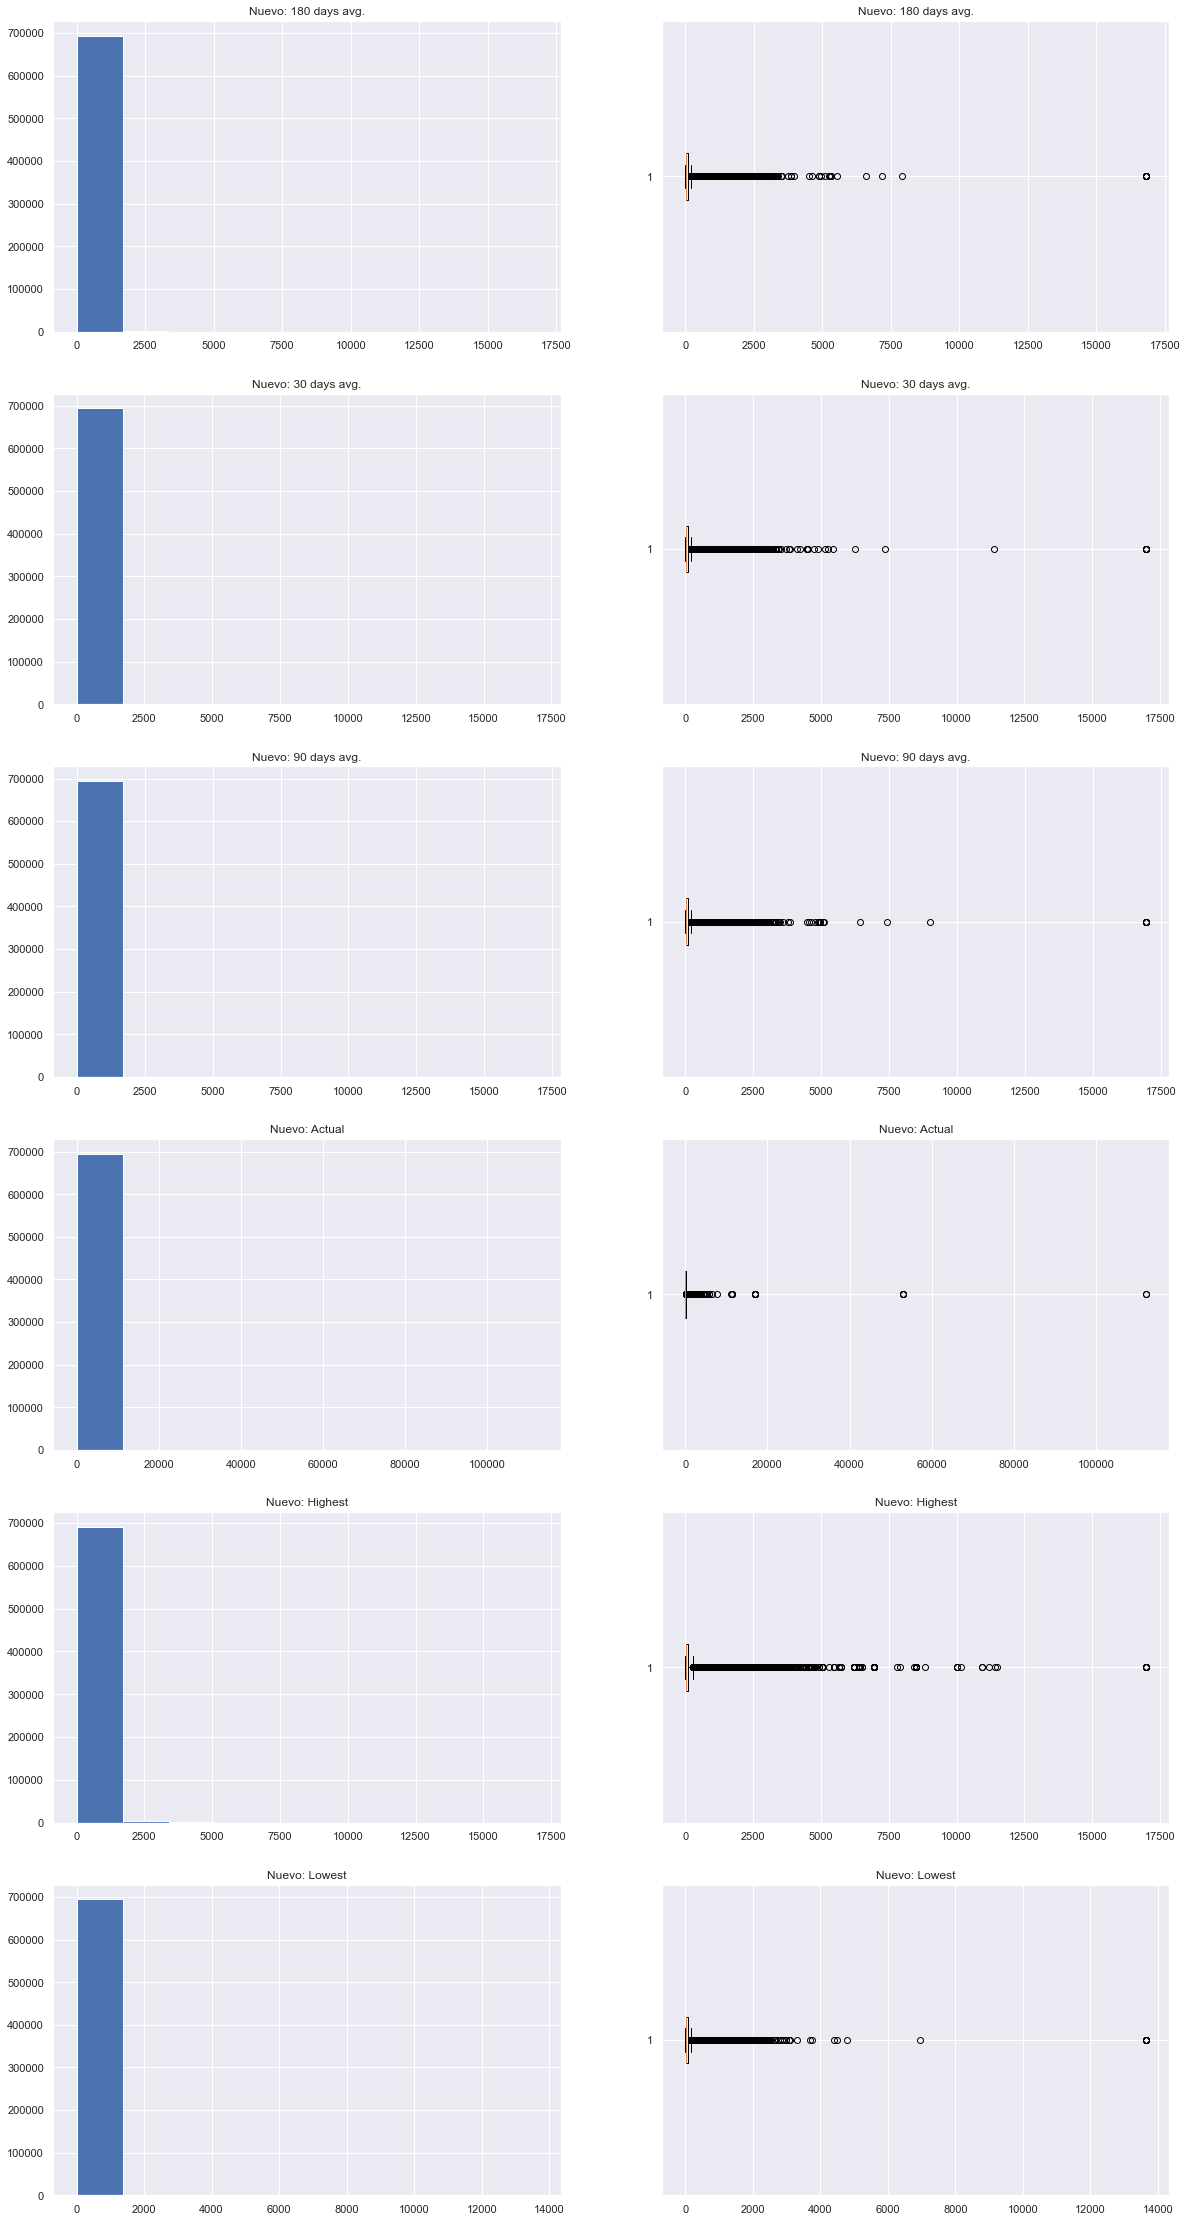

In [80]:
plt.figure(figsize=(20,40))
for i, var in enumerate(np.sort(df[nuevo_actual_col].describe().columns)):
    plt.subplot(df[nuevo_actual_col].columns.shape[0],2,2*i+1)
    plt.hist(df[nuevo_actual_col][var], bins = 10)
    plt.xlabel('')
    plt.title(var)
    plt.subplot(df[nuevo_actual_col].columns.shape[0],2,2*i+2)
    plt.boxplot(df[nuevo_actual_col][var], vert=False)
    plt.xlabel('')
    plt.title(var)

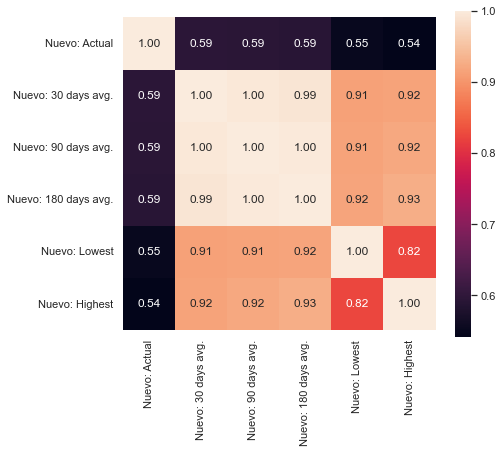

In [81]:
cm = df[nuevo_actual_col].corr()
f, ax = plt.subplots(figsize=(7, 6))
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f')
plt.show()

### Amazon: Actual (precio al que vende amazon y distribuye) 

La variable **Amazon: Actual** (precio al que vende amazon y distribuye) consideramos que es importante no eliminarla. Posee demasiados valores ausentes, realizamos la imputación en función de la variable **Nuevo: Actual_x**. Restamos a la primera variable la segunda obteniendo la diferencia, aplicamos la media a esos valores y sumamos esa media al valor de la variable Nuevo: Actual_x.

In [82]:
amazon_actual_col = ['Amazon: Actual', 'Amazon: 30 days avg.', 'Amazon: 90 days avg.', 'Amazon: 180 days avg.', 'Amazon: Lowest',
                     'Amazon: Highest']

In [83]:
my_missing(df[amazon_actual_col])

Número de registros: 694882


Amazon: Actual           502549
Amazon: 30 days avg.     469921
Amazon: 90 days avg.     442444
Amazon: 180 days avg.    419674
Amazon: Lowest           380013
Amazon: Highest          380013
dtype: int64

En porcentaje:


Amazon: Actual           72.321488
Amazon: 30 days avg.     67.626014
Amazon: 90 days avg.     63.671818
Amazon: 180 days avg.    60.395002
Amazon: Lowest           54.687415
Amazon: Highest          54.687415
dtype: float64

### Grupo de variables: Lista de precio.

In [84]:
col_lis_prec = ['Lista de precio: Actual', 'Lista de precio: 30 days avg.',
                'Lista de precio: 90 days avg.','Lista de precio: 180 days avg.',
                'Lista de precio: Lowest','Lista de precio: Highest']

In [85]:
my_missing(df[col_lis_prec])

Número de registros: 694882


Lista de precio: Actual           499877
Lista de precio: 30 days avg.     314625
Lista de precio: 90 days avg.     226229
Lista de precio: 180 days avg.    173919
Lista de precio: Lowest            80085
Lista de precio: Highest           80085
dtype: int64

En porcentaje:


Lista de precio: Actual           71.936962
Lista de precio: 30 days avg.     45.277472
Lista de precio: 90 days avg.     32.556463
Lista de precio: 180 days avg.    25.028566
Lista de precio: Lowest           11.524978
Lista de precio: Highest          11.524978
dtype: float64

In [86]:
df.head(10)

,Imagen,Título,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Last Price Change,Last Update,Last Offer Update,Amazon: Actual,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: 30 days drop %,Amazon: 90 days drop %,Amazon: Lowest,Amazon: Highest,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Lista de precio: Actual,Lista de precio: 30 days avg.,Lista de precio: 90 days avg.,Lista de precio: 180 days avg.,Lista de precio: 30 days drop %,Lista de precio: 90 days drop %,Lista de precio: Lowest,Lista de precio: Highest,Oferta flash: Actual,Oferta flash: Upcoming Deal,Oferta de almacén: Actual,Oferta de almacén: 30 days avg.,Oferta de almacén: 90 days avg.,Oferta de almacén: 180 days avg.,Oferta de almacén: 30 days drop %,Oferta de almacén: 90 days drop %,Oferta de almacén: Lowest,Oferta de almacén: Highest,Tracking since,ASIN,Brand,Product Group,Prime Eligible (Amazon offer),Fecha,Variation Attributes,Nuevo: 90 days OOS,Usado: 90 days OOS,Ratings - Format Specific,Review Count - Format Specific,Prime Eligible (Buy Box),Caja de Compra (Buy Box) 🚚: 90 days OOS,Category,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,usado,Nuevo: Actual,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: Lowest,Nuevo: Highest
0,https://images-na.ssl-images-amazon.com/images...,Poco X3 Pro Smartphone RAM 6GB ROM 128GB 120Hz...,91.0,91.0,3,473,8.0,8.0,8.0,Electrónica,# 1 | Top 1% | Móviles y smartphones libres,2021-03-29 01:02:00,2021-03-29 20:48:00,2021-03-29 10:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,no Amazon offer exists,3.0,3.0,249.00,249.00,249.00,249.00,0.0,0.0,249.00,249.00,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-16,B08YJFSHFM,Xiaomi,Electrónica,no,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,3.0,34.0,34.0,34.0,2.5,2.0,1.0,1.0,1.0,0.0,199.00,206.19,206.19,206.19,199.00,249.00
1,https://images-na.ssl-images-amazon.com/images...,"SAMSUNG Galaxy M11 | Smartphone Dual SIM, Pant...",99.0,99.0,6,24696,68.0,208.0,319.0,Electrónica,# 2 | Top 1% | Móviles y smartphones libres,2021-03-29 19:28:00,2021-03-29 20:56:00,2021-03-29 19:28:00,99.00,140.37,146.35,148.92,29.0,32.0,99.00,179.00,33.0,Amazon offer is in stock and shippable,28.0,32.0,159.90,159.96,169.92,170.66,0.0,6.0,145.00,179.00,NaN,no,92.07,124.27,125.81,127.65,34.0,37.0,87.12,143.44,2020-11-02,B08J7T7K26,SAMSUNG,Wireless,yes,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,6.0,809.0,569.0,1919.0,4.5,1421.0,1262.0,923.0,600.0,1.0,99.00,138.22,145.32,145.37,99.00,169.00
2,https://images-na.ssl-images-amazon.com/images...,"Xiaomi Redmi 9 - Smartphone de 6.53"" FHD+, 4 G...",-40.0,93.0,4,2696,26.0,189.0,442.0,Electrónica,# 3 | Top 1% | Móviles y smartphones libres,2021-03-29 21:16:00,2021-03-29 21:16:00,2021-03-29 18:04:00,NaN,133.49,138.89,146.95,NaN,NaN,117.98,169.00,74.0,no Amazon offer exists,0.0,12.0,179.00,179.00,179.00,176.59,0.0,0.0,139.67,179.00,NaN,no,NaN,111.70,128.59,130.30,NaN,NaN,95.63,145.04,2020-06-12,B089WCSTLY,Xiaomi,Wireless,no,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,7.0,5.0,95.0,146.0,4.5,7386.0,6882.0,6115.0,4642.0,1.0,119.00,119.58,135.47,142.03,114.50,179.00
3,https://images-na.ssl-images-amazon.com/images...,"Gigaset A116 - Teléfono Inalámbrico, Agenda 50...",27.0,47.0,2,454556,42.0,166.0,382.0,Electrónica,# 1 | Top 1% | Teléfonos analógicos,2021-03-29 02:20:00,2021-03-29 18:26:00,2021-03-29 18:26:00,14.99,

**CATEGORIZACIÓN DE VARIABLES CON MÁS DE 50% DE VALORES AUSENTES**

Realizamos la categorización de aquellos grupos de variables que poseen más del 50% de nulos en su variable principal.

In [87]:
cols_categorizacion = ['Amazon: Actual', 'Lista de precio: Actual']

In [88]:
df.head()

,Imagen,Título,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Last Price Change,Last Update,Last Offer Update,Amazon: Actual,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: 30 days drop %,Amazon: 90 days drop %,Amazon: Lowest,Amazon: Highest,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Lista de precio: Actual,Lista de precio: 30 days avg.,Lista de precio: 90 days avg.,Lista de precio: 180 days avg.,Lista de precio: 30 days drop %,Lista de precio: 90 days drop %,Lista de precio: Lowest,Lista de precio: Highest,Oferta flash: Actual,Oferta flash: Upcoming Deal,Oferta de almacén: Actual,Oferta de almacén: 30 days avg.,Oferta de almacén: 90 days avg.,Oferta de almacén: 180 days avg.,Oferta de almacén: 30 days drop %,Oferta de almacén: 90 days drop %,Oferta de almacén: Lowest,Oferta de almacén: Highest,Tracking since,ASIN,Brand,Product Group,Prime Eligible (Amazon offer),Fecha,Variation Attributes,Nuevo: 90 days OOS,Usado: 90 days OOS,Ratings - Format Specific,Review Count - Format Specific,Prime Eligible (Buy Box),Caja de Compra (Buy Box) 🚚: 90 days OOS,Category,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,usado,Nuevo: Actual,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: Lowest,Nuevo: Highest
0,https://images-na.ssl-images-amazon.com/images...,Poco X3 Pro Smartphone RAM 6GB ROM 128GB 120Hz...,91.0,91.0,3,473,8.0,8.0,8.0,Electrónica,# 1 | Top 1% | Móviles y smartphones libres,2021-03-29 01:02:00,2021-03-29 20:48:00,2021-03-29 10:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,no Amazon offer exists,3.0,3.0,249.0,249.00,249.00,249.00,0.0,0.0,249.00,249.00,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-16,B08YJFSHFM,Xiaomi,Electrónica,no,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,3.0,34.0,34.0,34.0,2.5,2.0,1.0,1.0,1.0,0.0,199.0,206.19,206.19,206.19,199.00,249.00
1,https://images-na.ssl-images-amazon.com/images...,"SAMSUNG Galaxy M11 | Smartphone Dual SIM, Pant...",99.0,99.0,6,24696,68.0,208.0,319.0,Electrónica,# 2 | Top 1% | Móviles y smartphones libres,2021-03-29 19:28:00,2021-03-29 20:56:00,2021-03-29 19:28:00,99.00,140.37,146.35,148.92,29.0,32.0,99.00,179.00,33.0,Amazon offer is in stock and shippable,28.0,32.0,159.9,159.96,169.92,170.66,0.0,6.0,145.00,179.00,NaN,no,92.07,124.27,125.81,127.65,34.0,37.0,87.12,143.44,2020-11-02,B08J7T7K26,SAMSUNG,Wireless,yes,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,6.0,809.0,569.0,1919.0,4.5,1421.0,1262.0,923.0,600.0,1.0,99.0,138.22,145.32,145.37,99.00,169.00
2,https://images-na.ssl-images-amazon.com/images...,"Xiaomi Redmi 9 - Smartphone de 6.53"" FHD+, 4 G...",-40.0,93.0,4,2696,26.0,189.0,442.0,Electrónica,# 3 | Top 1% | Móviles y smartphones libres,2021-03-29 21:16:00,2021-03-29 21:16:00,2021-03-29 18:04:00,NaN,133.49,138.89,146.95,NaN,NaN,117.98,169.00,74.0,no Amazon offer exists,0.0,12.0,179.0,179.00,179.00,176.59,0.0,0.0,139.67,179.00,NaN,no,NaN,111.70,128.59,130.30,NaN,NaN,95.63,145.04,2020-06-12,B089WCSTLY,Xiaomi,Wireless,no,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,7.0,5.0,95.0,146.0,4.5,7386.0,6882.0,6115.0,4642.0,1.0,119.0,119.58,135.47,142.03,114.50,179.00
3,https://images-na.ssl-images-amazon.com/images...,"Gigaset A116 - Teléfono Inalámbrico, Agenda 50...",27.0,47.0,2,454556,42.0,166.0,382.0,Electrónica,# 1 | Top 1% | Teléfonos analógicos,2021-03-29 02:20:00,2021-03-29 18:26:00,2021-03-29 18:26:00,14.99,15.80,

In [89]:
for col in cols_categorizacion:
    venta = pd.DataFrame(df[col])
    venta = venta.replace( [np.nan, 0.00], 0)
    venta.values[venta != 0] = 1

    venta = venta.rename(columns={col: f'{col}_cat'})
    df = pd.concat([df,venta], axis=1)

    df.drop([col], axis = 'columns', inplace=True)

#### Oferta flash

In [90]:
df['Oferta flash: Actual'].isnull().sum()

691844

Etiquetamos la columna oferta flash. Transformamos esta variable a categórica debido a que esta columna solo aparecen datos si se da la oferta.

In [91]:
oferta_flash = pd.DataFrame(df['Oferta flash: Actual'])
oferta_flash = oferta_flash.replace( [np.nan, 0.00], 'No')
oferta_flash.values[oferta_flash != 'No'] = 'Si'

oferta_flash = oferta_flash.rename(columns={'Oferta flash: Actual': 'oferta_flash'})
df = pd.concat([df,oferta_flash], axis=1)

df.drop(['Oferta flash: Actual'], axis = 'columns', inplace=True)

In [92]:
df.head(2)

,Imagen,Título,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Last Price Change,Last Update,Last Offer Update,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: 30 days drop %,Amazon: 90 days drop %,Amazon: Lowest,Amazon: Highest,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Lista de precio: 30 days avg.,Lista de precio: 90 days avg.,Lista de precio: 180 days avg.,Lista de precio: 30 days drop %,Lista de precio: 90 days drop %,Lista de precio: Lowest,Lista de precio: Highest,Oferta flash: Upcoming Deal,Oferta de almacén: Actual,Oferta de almacén: 30 days avg.,Oferta de almacén: 90 days avg.,Oferta de almacén: 180 days avg.,Oferta de almacén: 30 days drop %,Oferta de almacén: 90 days drop %,Oferta de almacén: Lowest,Oferta de almacén: Highest,Tracking since,ASIN,Brand,Product Group,Prime Eligible (Amazon offer),Fecha,Variation Attributes,Nuevo: 90 days OOS,Usado: 90 days OOS,Ratings - Format Specific,Review Count - Format Specific,Prime Eligible (Buy Box),Caja de Compra (Buy Box) 🚚: 90 days OOS,Category,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,usado,Nuevo: Actual,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: Lowest,Nuevo: Highest,Amazon: Actual_cat,Lista de precio: Actual_cat,oferta_flash
0,https://images-na.ssl-images-amazon.com/images...,Poco X3 Pro Smartphone RAM 6GB ROM 128GB 120Hz...,91.0,91.0,3,473,8.0,8.0,8.0,Electrónica,# 1 | Top 1% | Móviles y smartphones libres,2021-03-29 01:02:00,2021-03-29 20:48:00,2021-03-29 10:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,no Amazon offer exists,3.0,3.0,249.00,249.00,249.00,0.0,0.0,249.0,249.0,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-03-16,B08YJFSHFM,Xiaomi,Electrónica,no,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,3.0,34.0,34.0,34.0,2.5,2.0,1.0,1.0,1.0,0.0,199.0,206.19,206.19,206.19,199.0,249.0,0.0,1.0,No
1,https://images-na.ssl-images-amazon.com/images...,"SAMSUNG Galaxy M11 | Smartphone Dual SIM, Pant...",99.0,99.0,6,24696,68.0,208.0,319.0,Electrónica,# 2 | Top 1% | Móviles y smartphones libres,2021-03-29 19:28:00,2021-03-29 20:56:00,2021-03-29 19:28:00,140.37,146.35,148.92,29.0,32.0,99.0,179.0,33.0,Amazon offer is in stock and shippable,28.0,32.0,159.96,169.92,170.66,0.0,6.0,145.0,179.0,no,92.07,124.27,125.81,127.65,34.0,37.0,87.12,143.44,2020-11-02,B08J7T7K26,SAMSUNG,Wireless,yes,2021-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Móviles y smartphones libres,6.0,809.0,569.0,1919.0,4.5,1421.0,1262.0,923.0,600.0,1.0,99.0,138.22,145.32,145.37,99.0,169.0,1.0,1.0,No


#### Grupo de ofertas: Ofertas Almacén

In [93]:
col_ofertas_almacen = ['Oferta de almacén: Actual','Oferta de almacén: 30 days avg.','Oferta de almacén: 90 days avg.',
                       'Oferta de almacén: 180 days avg.','Oferta de almacén: 30 days drop %', 'Oferta de almacén: 90 days drop %',
                       'Oferta de almacén: Lowest', 'Oferta de almacén: Highest']

In [94]:
my_missing(df[col_ofertas_almacen])

Número de registros: 694882


Oferta de almacén: Actual            640555
Oferta de almacén: 30 days avg.      525779
Oferta de almacén: 90 days avg.      480263
Oferta de almacén: 180 days avg.     444016
Oferta de almacén: 30 days drop %    640555
Oferta de almacén: 90 days drop %    640555
Oferta de almacén: Lowest            368549
Oferta de almacén: Highest           368549
dtype: int64

En porcentaje:


Oferta de almacén: Actual            92.181838
Oferta de almacén: 30 days avg.      75.664501
Oferta de almacén: 90 days avg.      69.114324
Oferta de almacén: 180 days avg.     63.898043
Oferta de almacén: 30 days drop %    92.181838
Oferta de almacén: 90 days drop %    92.181838
Oferta de almacén: Lowest            53.037638
Oferta de almacén: Highest           53.037638
dtype: float64

In [95]:
oferta_almacen = pd.DataFrame(df['Oferta de almacén: Actual'])
oferta_almacen = oferta_almacen.replace( [np.nan, 0.00], 0)
oferta_almacen.values[oferta_almacen != 0] = 1

oferta_almacen = oferta_almacen.rename(columns={'Oferta de almacén: Actual': 'oferta_almacen'})
df = pd.concat([df,oferta_almacen], axis=1)

df.drop(['Oferta de almacén: Actual'], axis = 'columns', inplace=True)

Eliminamos los registros que suponen menos de un 5% de la columna

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694882 entries, 0 to 694881
Data columns (total 74 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   Imagen                                           694745 non-null  object        
 1   Título                                           694882 non-null  object        
 2   Rango de ventas: 30 days drop %                  694570 non-null  float64       
 3   Rango de ventas: 90 days drop %                  694570 non-null  float64       
 4   Rango de ventas: Lowest                          694882 non-null  int64         
 5   Rango de ventas: Highest                         694882 non-null  int64         
 6   Rango de ventas: Drops last 30 days              685058 non-null  float64       
 7   Rango de ventas: Drops last 90 days              688228 non-null  float64       
 8   Rango de ventas: Drops l

In [97]:
df.select_dtypes(include=['float64'])

,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Amazon: 30 days avg.,Amazon: 90 days avg.,Amazon: 180 days avg.,Amazon: 30 days drop %,Amazon: 90 days drop %,Amazon: Lowest,Amazon: Highest,Amazon: 90 days OOS,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Lista de precio: 30 days avg.,Lista de precio: 90 days avg.,Lista de precio: 180 days avg.,Lista de precio: 30 days drop %,Lista de precio: 90 days drop %,Lista de precio: Lowest,Lista de precio: Highest,Oferta de almacén: 30 days avg.,Oferta de almacén: 90 days avg.,Oferta de almacén: 180 days avg.,Oferta de almacén: 30 days drop %,Oferta de almacén: 90 days drop %,Oferta de almacén: Lowest,Oferta de almacén: Highest,Ratings - Format Specific,Review Count - Format Specific,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,usado,Nuevo: Actual,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: Lowest,Nuevo: Highest,Amazon: Actual_cat,Lista de precio: Actual_cat,oferta_almacen
0,91.0,91.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,3.0,3.0,249.00,249.00,249.00,0.0,0.0,249.00,249.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,34.0,34.0,34.0,2.500000,2.000000,1.000000,1.000000,1.000000,0.0,199.000000,206.19,206.19,206.19,199.00,249.00,0.0,1.0,0.0
1,99.0,99.0,68.0,208.0,319.0,140.37,146.35,148.92,29.0,32.0,99.00,179.00,33.0,28.0,32.0,159.96,169.92,170.66,0.0,6.0,145.00,179.00,124.27,125.81,127.65,34.0,37.0,87.12,143.44,NaN,NaN,6.0,809.0,569.0,1919.0,4.500000,1421.000000,1262.000000,923.000000,600.000000,1.0,99.000000,138.22,145.32,145.37,99.00,169.00,1.0,1.0,1.0
2,-40.0,93.0,26.0,189.0,442.0,133.49,138.89,146.95,NaN,NaN,117.98,169.00,74.0,0.0,12.0,179.00,179.00,176.59,0.0,0.0,139.67,179.00,111.70,128.59,130.30,NaN,NaN,95.63,145.04,NaN,NaN,7.0,5.0,95.0,146.0,4.500000,7386.000000,6882.000000,6115.000000,4642.000000,1.0,119.000000,119.58,135.47,142.03,114.50,179.00,0.0,1.0,0.0
3,27.0,47.0,42.0,166.0,382.0,15.80,15.61,15.22,5.0,4.0,8.94,18.68,9.0,-1.0,1.0,17.90,17.90,17.71,0.0,0.0,9.05,18.76,13.75,13.67,13.42,12.0,11.0,8.28,17.92,NaN,NaN,8.0,11.0,15.0,58.0,3.900000,4308.000000,4177.000000,3857.000000,3489.000000,1.0,14.800000,14.68,14.88,14.53,8.04,15.83,1.0,1.0,1.0
4,0.0,10.0,38.0,108.0,228.0,27.03,27.47,27.32,-3.0,-2.0,14.99,49.99,1.0,-3.0,-2.0,36.97,38.97,39.31,NaN,NaN,27.90,49.99,27.32,26.56,25.63,-1.0,1.0,20.66,32.54,NaN,NaN,9.0,9.0,10.0,12.0,4.500000,20586.000000,20392.000000,18243.000000,14064.000000,1.0,27.900000,27.03,27.47,27.29,14.99,41.68,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694877,2.0,12.0,3.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14312.0,14626.0,16304.0,18048.0,4.497323,3610.063415,3786.079512,4457.807813,4767.067797,0.0,4.990000,4.99,4.99,4.99,4.99,4.99,0.0,0.0,0.0
694878,-56.0,24.0,4.0,9.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14954.0,9558.0,19578.0,23023.0,4.360729,474.301688,467.961078,459.564143,447.768706,0.0,9.990000,9.99,9.99,9.99,5.49,9.99,0.0,0.0,0.0
694879,30.0,59.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.06,10.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15788.0,22662.0,38929.0,38929.0,3.900000,9.000000,8.000000,8.000000,8.000000,0.0,100.028089,9.97,9.97,9.98,9.06,10.18,0.0,0.0,0.0
694880,56.0,48.0,1.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.00,14.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [98]:
my_missing(df.select_dtypes(exclude=['float64']))

Número de registros: 694882


Imagen                                         137
Rango de ventas: Reference                     317
Rango de ventas: Subcategory Sales Ranks      2331
Last Offer Update                            12610
Brand                                         3658
Prime Eligible (Amazon offer)               284931
Variation Attributes                        401356
Nuevo: 90 days OOS                          155032
Usado: 90 days OOS                          154983
Prime Eligible (Buy Box)                    409951
Caja de Compra (Buy Box) 🚚: 90 days OOS     540145
dtype: int64

En porcentaje:


Imagen                                       0.019716
Rango de ventas: Reference                   0.045619
Rango de ventas: Subcategory Sales Ranks     0.335453
Last Offer Update                            1.814697
Brand                                        0.526420
Prime Eligible (Amazon offer)               41.004228
Variation Attributes                        57.758871
Nuevo: 90 days OOS                          22.310551
Usado: 90 days OOS                          22.303499
Prime Eligible (Buy Box)                    58.995772
Caja de Compra (Buy Box) 🚚: 90 days OOS     77.731903
dtype: float64

In [99]:
df[df['Brand'].isnull()]['Título']

864        Apple iPhone 8 64GB Space Grey (Reacondicionado)
904       18650 Batería Recargable de Iones de Litio 3.7...
1080      Carcasa para llave con mando a distancia y bot...
1486      18650 Batería de Litio Recargable 3.7V 8800mAh...
1532      Waymeduo Carcasa de Llave Remota para RENAULT ...
                                ...                        
694279    Rino3 3G Smartphone Pantalla de 5.0 Pulgadas P...
694537    Eatasty Fitness Trackers, reloj inteligente pa...
694599    Maxell 337 - SR416SW - 1 Pila de óxido de Plat...
694702    REPRODUCTOR MP3 MINI CLIP + SM FRUIT AURICULAR...
694712    Tres SuperSIM Super SIM Tarjeta SIM / Tarjeta ...
Name: Título, Length: 3658, dtype: object

In [100]:
df.isnull().sum()

Imagen                                                137
Título                                                  0
Rango de ventas: 30 days drop %                       312
Rango de ventas: 90 days drop %                       312
Rango de ventas: Lowest                                 0
Rango de ventas: Highest                                0
Rango de ventas: Drops last 30 days                  9824
Rango de ventas: Drops last 90 days                  6654
Rango de ventas: Drops last 180 days                 5748
Rango de ventas: Reference                            317
Rango de ventas: Subcategory Sales Ranks             2331
Last Price Change                                       0
Last Update                                             0
Last Offer Update                                   12610
Amazon: 30 days avg.                               469921
Amazon: 90 days avg.                               442444
Amazon: 180 days avg.                              419674
Amazon: 30 day

In [101]:
df_const_nan = pd.DataFrame(df.isnull().sum(), columns = ['n_NaN'])

Extraemos las columnas con un porcentaje de NaN inferior al 5%

In [102]:
cols_const = []
porc_NaN = 5
for i, row in df_const_nan.iterrows():
    if row[0]<round(len(df)*porc_NaN/100):
        cols_const.append(i)

Eliminamos los registros que suponen menos del 5% del total de la columna

In [103]:
df = df.dropna(subset=cols_const)

In [104]:
list_null = pd.DataFrame(df.isnull().sum()).reset_index()
list_notnull = list_null[list_null[0] == 0]
list_x = list(list_notnull['index'])

In [105]:
df = df[list_x]

In [106]:
df.isnull().sum()

Imagen                                             0
Título                                             0
Rango de ventas: 30 days drop %                    0
Rango de ventas: 90 days drop %                    0
Rango de ventas: Lowest                            0
Rango de ventas: Highest                           0
Rango de ventas: Drops last 30 days                0
Rango de ventas: Drops last 90 days                0
Rango de ventas: Drops last 180 days               0
Rango de ventas: Reference                         0
Rango de ventas: Subcategory Sales Ranks           0
Last Price Change                                  0
Last Update                                        0
Last Offer Update                                  0
Amazon: 90 days OOS                                0
Amazon: Availability of the Amazon offer           0
Nuevo: 30 days drop %                              0
Nuevo: 90 days drop %                              0
Oferta flash: Upcoming Deal                   

#### Antes de seguir con el analisis de los campos con NaN vamos a crear una serie de variables que nos ayudaran en nuestro analisis de cara a poder comparar precios de una semana, día o mes contra otr@. 

Para ello creamos una función donde:

*   fecha1: fecha inicio para compara con otra fecha. Pueden ser días o un conjunto de días (semanas). Es el dia donde lanzaríamos la predicción.
*   nweeks: rango de días o semanas para comparar.
*   fecha2: la fecha donde queremos realizar la predicción.

In [107]:
def prepara_datos(df, fecha, nweeks):
    fecha1 = []
    fecha2 = []
    df12 = pd.DataFrame()
    n = 7

    for i in range(n*nweeks):
        fecha1.append(fecha+datetime.timedelta(days=i))
        fecha2.append(fecha+datetime.timedelta(days=i)+n*datetime.timedelta(days=nweeks))

        #Filtrado por fechas: obtengo un df con la fecha, ASIN y precio
        df1_aux =(df[df['Fecha']==fecha1[i]])
#         df2_aux =(df[df['Fecha']==fecha2[i]]) [['ASIN', 'Nuevo: Actual', 'Fecha']]
        df2_aux =(df[df['Fecha']==fecha2[i]])[['ASIN', 'Nuevo: Actual', 'Fecha']]

        print(df2_aux.shape)
        #Filtrado por ASIN
        df12 = df12.append(df1_aux.merge(df2_aux, how = 'inner', on = ['ASIN']))

    #Transformamos el formato Nuevo: Actual (Precio). Strig -> float
    df12[['Nuevo: Actual_x','Nuevo: Actual_y' ]] = df12[['Nuevo: Actual_x','Nuevo: Actual_y' ]].replace('€ ', '', regex=True).apply(pd.to_numeric, errors='coerce', axis=1)

    #Creamos la columna target: 
    df12['Diferencia'] = df12['Nuevo: Actual_y']-df12['Nuevo: Actual_x']  
    conditions = [(df12['Diferencia']>0), (df12['Diferencia']<0), (df12['Diferencia']==0)]
    values=[1,-1,0]
    df12['Target']= np.select(conditions, values)
    df12['% Variacion'] = (df12['Diferencia']*100/df12['Nuevo: Actual_x']).round(2)
    return df12

In [108]:
df['Fecha'].head(2)

0    2021-03-29
1    2021-03-29
Name: Fecha, dtype: object

In [109]:
df['Fecha'].tail(2)

694878    2021-08-15
694881    2021-08-15
Name: Fecha, dtype: object

In [110]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format = "%Y/%m/%d")

In [111]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format = "%d/%m/%Y")
fechaS1 = datetime.datetime.strptime('29/3/2021', "%d/%m/%Y")
nweeks = 7 # Te compara la fechaS1 con el numero de semanas que introduzcas
df_training = prepara_datos(df, fechaS1, nweeks)

(4713, 3)
(4723, 3)
(4733, 3)
(4714, 3)
(4738, 3)
(4704, 3)
(4705, 3)
(4700, 3)
(4688, 3)
(4681, 3)
(4696, 3)
(4697, 3)
(4702, 3)
(4669, 3)
(4684, 3)
(0, 3)
(4679, 3)
(4704, 3)
(4679, 3)
(4676, 3)
(4673, 3)
(4661, 3)
(4681, 3)
(4716, 3)
(4718, 3)
(4721, 3)
(4750, 3)
(4733, 3)
(4751, 3)
(4760, 3)
(4767, 3)
(4771, 3)
(4744, 3)
(4744, 3)
(4723, 3)
(4720, 3)
(4686, 3)
(4731, 3)
(4731, 3)
(4688, 3)
(4712, 3)
(4731, 3)
(4707, 3)
(4737, 3)
(4719, 3)
(4721, 3)
(4711, 3)
(4711, 3)
(4687, 3)


In [112]:
df_training.shape  # X_const, y_train = X_const['target']

(103716, 50)

In [113]:
df_training.head(3)

,Imagen,Título,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Last Price Change,Last Update,Last Offer Update,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Oferta flash: Upcoming Deal,Tracking since,ASIN,Brand,Product Group,Fecha_x,Category,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,usado,Nuevo: Actual_x,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: Lowest,Nuevo: Highest,Amazon: Actual_cat,Lista de precio: Actual_cat,oferta_flash,oferta_almacen,Nuevo: Actual_y,Fecha_y,Diferencia,Target,% Variacion
0,https://images-na.ssl-images-amazon.com/images...,Poco X3 Pro Smartphone RAM 6GB ROM 128GB 120Hz...,91.0,91.0,3,473,8.0,8.0,8.0,Electrónica,# 1 | Top 1% | Móviles y smartphones libres,2021-03-29 01:02:00,2021-03-29 20:48:00,2021-03-29 10:24:00,100.0,no Amazon offer exists,3.0,3.0,no,2021-03-16,B08YJFSHFM,Xiaomi,Electrónica,2021-03-29,Móviles y smartphones libres,3.0,34.0,34.0,34.0,2.5,2.0,1.0,1.0,1.0,0.0,199.0,206.19,206.19,206.19,199.0,249.0,0.0,1.0,No,0.0,196.99,2021-05-17,-2.01,-1,-1.01
1,https://images-na.ssl-images-amazon.com/images...,"SAMSUNG Galaxy M11 | Smartphone Dual SIM, Pant...",99.0,99.0,6,24696,68.0,208.0,319.0,Electrónica,# 2 | Top 1% | Móviles y smartphones libres,2021-03-29 19:28:00,2021-03-29 20:56:00,2021-03-29 19:28:00,33.0,Amazon offer is in stock and shippable,28.0,32.0,no,2020-11-02,B08J7T7K26,SAMSUNG,Wireless,2021-03-29,Móviles y smartphones libres,6.0,809.0,569.0,1919.0,4.5,1421.0,1262.0,923.0,600.0,1.0,99.0,138.22,145.32,145.37,99.0,169.0,1.0,1.0,No,1.0,116.99,2021-05-17,17.99,1,18.17
2,https://images-na.ssl-images-amazon.com/images...,"Xiaomi Redmi 9 - Smartphone de 6.53"" FHD+, 4 G...",-40.0,93.0,4,2696,26.0,189.0,442.0,Electrónica,# 3 | Top 1% | Móviles y smartphones libres,2021-03-29 21:16:00,2021-03-29 21:16:00,2021-03-29 18:04:00,74.0,no Amazon offer exists,0.0,12.0,no,2020-06-12,B089WCSTLY,Xiaomi,Wireless,2021-03-29,Móviles y smartphones libres,7.0,5.0,95.0,146.0,4.5,7386.0,6882.0,6115.0,4642.0,1.0,119.0,119.58,135.47,142.03,114.5,179.0,0.0,1.0,No,0.0,123.00,2021-05-17,4.00,1,3.36


Comprobamos que efectivamente se ha calculado correctamente la diferencia de precios.

In [114]:
df_training[df_training['ASIN']=='B08YJFSHFM'][['Fecha_x', 'Nuevo: Actual_x','Fecha_y','Nuevo: Actual_y','Diferencia','% Variacion', 'Target']]

,Fecha_x,Nuevo: Actual_x,Fecha_y,Nuevo: Actual_y,Diferencia,% Variacion,Target
0,2021-03-29,199.00,2021-05-17,196.99,-2.01,-1.01,-1
0,2021-03-30,249.00,2021-05-18,196.99,-52.01,-20.89,-1
1,2021-03-31,249.00,2021-05-19,196.99,-52.01,-20.89,-1
4,2021-04-01,249.00,2021-05-20,196.99,-52.01,-20.89,-1
11,2021-04-02,249.00,2021-05-21,196.99,-52.01,-20.89,-1
11,2021-04-03,249.00,2021-05-22,196.95,-52.05,-20.90,-1
10,2021-04-04,249.00,2021-05-23,196.95,-52.05,-20.90,-1
15,2021-04-05,243.00,2021-05-24,196.96,-46.04,-18.95,-1
0,2021-04-06,199.00,2021-05-25,196.96,-2.04,-1.03,-1
0,2021-04-07,199.00,2021-05-26,196.95,-2.05,-1.03,-1


In [115]:
fechaS2 = datetime.datetime.strptime('05/07/2021', "%d/%m/%Y")+datetime.timedelta(days=7)
nweeks = 3
df_test = prepara_datos(df, fechaS2, nweeks)

(4684, 3)
(4661, 3)
(4640, 3)
(4677, 3)
(4692, 3)
(4665, 3)
(4659, 3)
(4643, 3)
(4672, 3)
(4703, 3)
(4664, 3)
(4703, 3)
(4680, 3)
(4641, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)
(0, 3)


In [116]:
df_test['Fecha_x'].head(2)

0   2021-07-12
1   2021-07-12
Name: Fecha_x, dtype: datetime64[ns]

In [117]:
df_test['Fecha_y'].tail(2)

2348   2021-08-15
2349   2021-08-15
Name: Fecha_y, dtype: datetime64[ns]

In [118]:
df_test[df_test['ASIN']=='B08YJFSHFM'][['Fecha_x', 'Nuevo: Actual_x','Fecha_y','Nuevo: Actual_y','Diferencia','% Variacion', 'Target']]

,Fecha_x,Nuevo: Actual_x,Fecha_y,Nuevo: Actual_y,Diferencia,% Variacion,Target


In [119]:
df_test.isnull().sum()

Imagen                                             0
Título                                             0
Rango de ventas: 30 days drop %                    0
Rango de ventas: 90 days drop %                    0
Rango de ventas: Lowest                            0
Rango de ventas: Highest                           0
Rango de ventas: Drops last 30 days                0
Rango de ventas: Drops last 90 days                0
Rango de ventas: Drops last 180 days               0
Rango de ventas: Reference                         0
Rango de ventas: Subcategory Sales Ranks           0
Last Price Change                                  0
Last Update                                        0
Last Offer Update                                  0
Amazon: 90 days OOS                                0
Amazon: Availability of the Amazon offer           0
Nuevo: 30 days drop %                              0
Nuevo: 90 days drop %                              0
Oferta flash: Upcoming Deal                   

In [120]:
df_test.tail(2)

,Imagen,Título,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Last Price Change,Last Update,Last Offer Update,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Oferta flash: Upcoming Deal,Tracking since,ASIN,Brand,Product Group,Fecha_x,Category,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,usado,Nuevo: Actual_x,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: Lowest,Nuevo: Highest,Amazon: Actual_cat,Lista de precio: Actual_cat,oferta_flash,oferta_almacen,Nuevo: Actual_y,Fecha_y,Diferencia,Target,% Variacion
2348,https://images-na.ssl-images-amazon.com/images...,"Mini Camara Espia Oculta WiFi Acuatica, NIYPS ...",23.0,31.0,37,25924,4.0,10.0,18.0,Electrónica,# 103 | Top -% | Cámaras espía,2021-06-13 08:00:00,2021-07-25 22:10:00,2021-07-17 11:38:00,100.0,no Amazon offer exists,0.0,0.0,no,2018-11-02,B07HTYH593,NIYPS,Electrónica,2021-07-25,Cámaras espía,9775.0,12683.0,14162.0,14488.0,2.9,102.0,102.0,106.0,107.0,0.0,52.99,52.99,52.99,52.99,33.08,99.99,0.0,0.0,No,0.0,52.99,2021-08-15,0.00,0,0.00
2349,https://images-na.ssl-images-amazon.com/images...,"WiFi Display Dongle, YEHUA 4K Miracast HDMI Do...",48.0,48.0,4384,33936,2.0,2.0,2.0,Electrónica,# 131 | Top -% | Clientes de streaming,2021-07-05 21:00:00,2021-07-25 22:10:00,2021-07-23 04:20:00,100.0,no Amazon offer exists,0.0,0.0,no,2021-07-03,B097T1H29P,Yehua,Electrónica,2021-07-25,Clientes de streaming,10127.0,19369.0,19369.0,19369.0,3.8,140.0,110.0,110.0,110.0,0.0,28.99,28.99,28.99,28.99,28.99,28.99,0.0,0.0,No,0.0,28.77,2021-08-15,-0.22,-1,-0.76


In [121]:
print(df_training.shape)
print(df_test.shape)

(103716, 50)
(32365, 50)


Definimos el conjunto de entrenamiento como el de construcción y el de test como explotación.

In [122]:
df_const = df_training
df_explo = df_test

Tamaño del dataset

In [123]:
print("Tamaño dataset del dataset construccion", df_const.shape)
print("Número de variables/predictores (columnas)", df_const.shape[1])
print("Número de registros (instancias/filas)", df_const.shape[0])


Tamaño dataset del dataset construccion (103716, 50)
Número de variables/predictores (columnas) 50
Número de registros (instancias/filas) 103716


In [124]:
# Explotacion 
print("Tamaño dataset del dataset construccion", df_explo.shape)
print("Número de variables/predictores (columnas)", df_explo.shape[1])
print("Número de registros (instancias/filas)", df_explo.shape[0])

Tamaño dataset del dataset construccion (32365, 50)
Número de variables/predictores (columnas) 50
Número de registros (instancias/filas) 32365


Comprobamos que el número de columnas coincide en ambos dataset

In [125]:
df_const.columns == df_explo.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

Comparamos columnas

In [126]:
def compara_columnas(cols1, cols2):
    if len(cols1) != len(cols2):
        print("El número de columnas es diferente!")
    else:
        if sum(cols1==cols2) != len(cols1):
            print("Coincide el número de columnas pero no casan!")
        else:
            print("Coinciden!!")

In [127]:
compara_columnas(df_const.columns, df_explo.columns)

Coinciden!!


In [128]:
df_const.head(3)

,Imagen,Título,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Last Price Change,Last Update,Last Offer Update,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Oferta flash: Upcoming Deal,Tracking since,ASIN,Brand,Product Group,Fecha_x,Category,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,usado,Nuevo: Actual_x,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: Lowest,Nuevo: Highest,Amazon: Actual_cat,Lista de precio: Actual_cat,oferta_flash,oferta_almacen,Nuevo: Actual_y,Fecha_y,Diferencia,Target,% Variacion
0,https://images-na.ssl-images-amazon.com/images...,Poco X3 Pro Smartphone RAM 6GB ROM 128GB 120Hz...,91.0,91.0,3,473,8.0,8.0,8.0,Electrónica,# 1 | Top 1% | Móviles y smartphones libres,2021-03-29 01:02:00,2021-03-29 20:48:00,2021-03-29 10:24:00,100.0,no Amazon offer exists,3.0,3.0,no,2021-03-16,B08YJFSHFM,Xiaomi,Electrónica,2021-03-29,Móviles y smartphones libres,3.0,34.0,34.0,34.0,2.5,2.0,1.0,1.0,1.0,0.0,199.0,206.19,206.19,206.19,199.0,249.0,0.0,1.0,No,0.0,196.99,2021-05-17,-2.01,-1,-1.01
1,https://images-na.ssl-images-amazon.com/images...,"SAMSUNG Galaxy M11 | Smartphone Dual SIM, Pant...",99.0,99.0,6,24696,68.0,208.0,319.0,Electrónica,# 2 | Top 1% | Móviles y smartphones libres,2021-03-29 19:28:00,2021-03-29 20:56:00,2021-03-29 19:28:00,33.0,Amazon offer is in stock and shippable,28.0,32.0,no,2020-11-02,B08J7T7K26,SAMSUNG,Wireless,2021-03-29,Móviles y smartphones libres,6.0,809.0,569.0,1919.0,4.5,1421.0,1262.0,923.0,600.0,1.0,99.0,138.22,145.32,145.37,99.0,169.0,1.0,1.0,No,1.0,116.99,2021-05-17,17.99,1,18.17
2,https://images-na.ssl-images-amazon.com/images...,"Xiaomi Redmi 9 - Smartphone de 6.53"" FHD+, 4 G...",-40.0,93.0,4,2696,26.0,189.0,442.0,Electrónica,# 3 | Top 1% | Móviles y smartphones libres,2021-03-29 21:16:00,2021-03-29 21:16:00,2021-03-29 18:04:00,74.0,no Amazon offer exists,0.0,12.0,no,2020-06-12,B089WCSTLY,Xiaomi,Wireless,2021-03-29,Móviles y smartphones libres,7.0,5.0,95.0,146.0,4.5,7386.0,6882.0,6115.0,4642.0,1.0,119.0,119.58,135.47,142.03,114.5,179.0,0.0,1.0,No,0.0,123.00,2021-05-17,4.00,1,3.36


In [129]:
df_const.set_index('ASIN', inplace = True)
df_explo.set_index('ASIN', inplace = True)

Creamos una columna con el día y otra con el mes para identificar el precio en ese mes y día.

In [130]:
df_const['Day'] = df_const['Fecha_x'].dt.day
df_const['Month'] = df_const['Fecha_x'].dt.month

In [131]:
df_explo['Day'] = df_explo['Fecha_x'].dt.day
df_explo['Month'] = df_explo['Fecha_x'].dt.month

In [132]:
df_const_num = df_const.select_dtypes(include=['float64', 'int32', 'int64'])
df_explo_num = df_explo.select_dtypes(include=['float64', 'int32', 'int64'])

In [133]:
print(df_const_num.shape)
print(df_explo_num.shape)

(103716, 35)
(32365, 35)


## PREPARACIÓN DEL CONJUNTO DE ENTRENAMIENTO

In [134]:
df_const_num.isnull().sum()

Rango de ventas: 30 days drop %                    0
Rango de ventas: 90 days drop %                    0
Rango de ventas: Lowest                            0
Rango de ventas: Highest                           0
Rango de ventas: Drops last 30 days                0
Rango de ventas: Drops last 90 days                0
Rango de ventas: Drops last 180 days               0
Amazon: 90 days OOS                                0
Nuevo: 30 days drop %                              0
Nuevo: 90 days drop %                              0
Rango de ventas: Actual                            0
Rango de ventas: 30 days avg.                      0
Rango de ventas: 90 days avg.                      0
Rango de ventas: 180 days avg.                     0
Reviews: Valoraciones                              0
Reviews: Recuento de Revisiones                    0
Reviews: Recuento de Revisiones - 30 days avg.     0
Reviews: Recuento de Revisiones - 90 days avg.     0
Reviews: Recuento de Revisiones - 180 days avg

In [135]:
X_train = df_const_num.drop(columns = ['Target'])
y_train = df_const_num['Target']

X_test = df_explo_num.drop(columns = ['Target'])
y_test = df_explo_num['Target']


In [136]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((103716, 34), (103716,), (32365, 34), (32365,))

In [137]:
X_train.head(3)

,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Amazon: 90 days OOS,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,usado,Nuevo: Actual_x,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: Lowest,Nuevo: Highest,Amazon: Actual_cat,Lista de precio: Actual_cat,oferta_almacen,Nuevo: Actual_y,Diferencia,% Variacion,Day,Month
ASIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B08YJFSHFM,91.0,91.0,3,473,8.0,8.0,8.0,100.0,3.0,3.0,3.0,34.0,34.0,34.0,2.5,2.0,1.0,1.0,1.0,0.0,199.0,206.19,206.19,206.19,199.0,249.0,0.0,1.0,0.0,196.99,-2.01,-1.01,29,3
B08J7T7K26,99.0,99.0,6,24696,68.0,208.0,319.0,33.0,28.0,32.0,6.0,809.0,569.0,1919.0,4.5,1421.0,1262.0,923.0,600.0,1.0,99.0,138.22,145.32,145.37,99.0,169.0,1.0,1.0,1.0,116.99,17.99,18.17,29,3
B089WCSTLY,-40.0,93.0,4,2696,26.0,189.0,442.0,74.0,0.0,12.0,7.0,5.0,95.0,146.0,4.5,7386.0,6882.0,6115.0,4642.0,1.0,119.0,119.58,135.47,142.03,114.5,179.0,0.0,1.0,0.0,123.00,4.00,3.36,29,3


In [138]:
df_const.head(3)

,Imagen,Título,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Last Price Change,Last Update,Last Offer Update,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Oferta flash: Upcoming Deal,Tracking since,Brand,Product Group,Fecha_x,Category,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,usado,Nuevo: Actual_x,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: Lowest,Nuevo: Highest,Amazon: Actual_cat,Lista de precio: Actual_cat,oferta_flash,oferta_almacen,Nuevo: Actual_y,Fecha_y,Diferencia,Target,% Variacion,Day,Month
ASIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B08YJFSHFM,https://images-na.ssl-images-amazon.com/images...,Poco X3 Pro Smartphone RAM 6GB ROM 128GB 120Hz...,91.0,91.0,3,473,8.0,8.0,8.0,Electrónica,# 1 | Top 1% | Móviles y smartphones libres,2021-03-29 01:02:00,2021-03-29 20:48:00,2021-03-29 10:24:00,100.0,no Amazon offer exists,3.0,3.0,no,2021-03-16,Xiaomi,Electrónica,2021-03-29,Móviles y smartphones libres,3.0,34.0,34.0,34.0,2.5,2.0,1.0,1.0,1.0,0.0,199.0,206.19,206.19,206.19,199.0,249.0,0.0,1.0,No,0.0,196.99,2021-05-17,-2.01,-1,-1.01,29,3
B08J7T7K26,https://images-na.ssl-images-amazon.com/images...,"SAMSUNG Galaxy M11 | Smartphone Dual SIM, Pant...",99.0,99.0,6,24696,68.0,208.0,319.0,Electrónica,# 2 | Top 1% | Móviles y smartphones libres,2021-03-29 19:28:00,2021-03-29 20:56:00,2021-03-29 19:28:00,33.0,Amazon offer is in stock and shippable,28.0,32.0,no,2020-11-02,SAMSUNG,Wireless,2021-03-29,Móviles y smartphones libres,6.0,809.0,569.0,1919.0,4.5,1421.0,1262.0,923.0,600.0,1.0,99.0,138.22,145.32,145.37,99.0,169.0,1.0,1.0,No,1.0,116.99,2021-05-17,17.99,1,18.17,29,3
B089WCSTLY,https://images-na.ssl-images-amazon.com/images...,"Xiaomi Redmi 9 - Smartphone de 6.53"" FHD+, 4 G...",-40.0,93.0,4,2696,26.0,189.0,442.0,Electrónica,# 3 | Top 1% | Móviles y smartphones libres,2021-03-29 21:16:00,2021-03-29 21:16:00,2021-03-29 18:04:00,74.0,no Amazon offer exists,0.0,12.0,no,2020-06-12,Xiaomi,Wireless,2021-03-29,Móviles y smartphones libres,7.0,5.0,95.0,146.0,4.5,7386.0,6882.0,6115.0,4642.0,1.0,119.0,119.58,135.47,142.03,114.5,179.0,0.0,1.0,No,0.0,123.00,2021-05-17,4.00,1,3.36,29,3


In [139]:
y_train.value_counts()

 0    45989
-1    31732
 1    25995
Name: Target, dtype: int64

In [140]:
y_test.value_counts()

 0    18225
 1     8457
-1     5683
Name: Target, dtype: int64

## Probamos Modelos

In [141]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_KNN=knn.predict(X_test)

print("KNN reporte \n", classification_report(y_test, y_pred_KNN))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred_KNN),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

KNN reporte 
               precision    recall  f1-score   support

          -1       0.22      0.39      0.28      5683
           0       0.61      0.52      0.56     18225
           1       0.28      0.23      0.26      8457

    accuracy                           0.42     32365
   macro avg       0.37      0.38      0.37     32365
weighted avg       0.46      0.42      0.43     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          2233          2135         1315
True 0           5189          9403         3633
True 1           2697          3791         1969


In [142]:
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_TREE=tree.predict(X_test)

print("Árbol de Decisión reporte", classification_report(y_test, y_pred_TREE))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred_TREE),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)  
print(conf)

Árbol de Decisión reporte               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5683
           0       1.00      1.00      1.00     18225
           1       1.00      1.00      1.00      8457

    accuracy                           1.00     32365
   macro avg       1.00      1.00      1.00     32365
weighted avg       1.00      1.00      1.00     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          5683             0            0
True 0              0         18225            0
True 1              0             0         8457


In [143]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred_RF=random_forest.predict(X_test)

print("Random Forest reporte \n", classification_report(y_test, y_pred_RF))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred_RF),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

Random Forest reporte 
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5683
           0       1.00      1.00      1.00     18225
           1       1.00      1.00      1.00      8457

    accuracy                           1.00     32365
   macro avg       1.00      1.00      1.00     32365
weighted avg       1.00      1.00      1.00     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          5683             0            0
True 0              0         18225            0
True 1              0             3         8454


In [144]:
nb=GaussianNB()
nb.fit(X_train, y_train)

y_pred_G=nb.predict(X_test)

print("GAUSS reporte \n", classification_report(y_test, y_pred_G))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred_G),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

GAUSS reporte 
               precision    recall  f1-score   support

          -1       0.50      0.14      0.22      5683
           0       0.64      0.93      0.76     18225
           1       0.53      0.28      0.36      8457

    accuracy                           0.62     32365
   macro avg       0.56      0.45      0.45     32365
weighted avg       0.59      0.62      0.56     32365

         Predicted -1  Predicted  0  Predicted 1
True -1           792          3830         1061
True 0            362         16885          978
True 1            445          5674         2338


In [145]:
LR=LogisticRegression()
LR.fit(X_train, y_train)
Y_pred_LR=LR.predict(X_test)
print("LR reporte \n", classification_report(y_test,Y_pred_LR))

conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_LR),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

LR reporte 
               precision    recall  f1-score   support

          -1       0.31      0.14      0.20      5683
           0       0.59      0.91      0.72     18225
           1       0.36      0.07      0.11      8457

    accuracy                           0.55     32365
   macro avg       0.42      0.37      0.34     32365
weighted avg       0.48      0.55      0.47     32365

         Predicted -1  Predicted  0  Predicted 1
True -1           817          4575          291
True 0            919         16573          733
True 1            934          6958          565


/Users/keylafloresguerrero/Applications/anaconda3/envs/keyla/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
sgd=SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred_sgd=sgd.predict(X_test)
print("SGD reporte \n", classification_report(y_test, Y_pred_sgd))


conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_sgd),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)


SGD reporte 
               precision    recall  f1-score   support

          -1       0.35      0.34      0.34      5683
           0       0.60      0.88      0.72     18225
           1       0.71      0.01      0.01      8457

    accuracy                           0.56     32365
   macro avg       0.55      0.41      0.36     32365
weighted avg       0.59      0.56      0.47     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          1945          3719           19
True 0           2102         16123            0
True 1           1557          6854           46


In [147]:
XGB=XGBClassifier ()

XGB.fit(X_train, y_train)

Y_pred_XGB=XGB.predict(X_test)

print("XGB reporte \n", classification_report(y_test, Y_pred_XGB))

conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_XGB),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

/Users/keylafloresguerrero/Applications/anaconda3/envs/keyla/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:21:21] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB reporte 
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5683
           0       1.00      1.00      1.00     18225
           1       1.00      1.00      1.00      8457

    accuracy                           1.00     32365
   macro avg       1.00      1.00      1.00     32365
weighted avg       1.00      1.00      1.00     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          5683             0            0
True 0              0         18225            0
True 1              0             0         8457


In [148]:
AdaB=AdaBoostClassifier()
AdaB.fit(X_train, y_train)

Y_pred_AdaB=AdaB.predict(X_test)
print("AdaBoost Classifier reporte \n", classification_report(y_test,Y_pred_AdaB))


conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_AdaB),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

AdaBoost Classifier reporte 
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5683
           0       1.00      1.00      1.00     18225
           1       1.00      1.00      1.00      8457

    accuracy                           1.00     32365
   macro avg       1.00      1.00      1.00     32365
weighted avg       1.00      1.00      1.00     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          5683             0            0
True 0              0         18225            0
True 1              0             0         8457


In [149]:
bagging=BaggingClassifier()
bagging.fit(X_train, y_train)

Y_pred_bagging=bagging.predict(X_test)
print("Bagging reporte \n", classification_report(y_test,Y_pred_bagging))

conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_bagging),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

Bagging reporte 
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5683
           0       1.00      1.00      1.00     18225
           1       1.00      1.00      1.00      8457

    accuracy                           1.00     32365
   macro avg       1.00      1.00      1.00     32365
weighted avg       1.00      1.00      1.00     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          5683             0            0
True 0              0         18225            0
True 1              0             0         8457


In [150]:
GBC=GradientBoostingClassifier()
GBC.fit(X_train, y_train)
Y_pred_GBC=GBC.predict(X_test)
print("Gradient Boosting Classifier reporte \n", classification_report(y_test,Y_pred_GBC))


conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_GBC),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

Gradient Boosting Classifier reporte 
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5683
           0       1.00      1.00      1.00     18225
           1       1.00      1.00      1.00      8457

    accuracy                           1.00     32365
   macro avg       1.00      1.00      1.00     32365
weighted avg       1.00      1.00      1.00     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          5683             0            0
True 0              0         18225            0
True 1              0             0         8457


In [151]:
ETC=ExtraTreeClassifier()
ETC.fit(X_train, y_train)
Y_pred_ETC=ETC.predict(X_test)
print("Extra Tree Classifier reporte \n", classification_report(y_test, Y_pred_ETC))


conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_ETC),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

Extra Tree Classifier reporte 
               precision    recall  f1-score   support

          -1       0.49      0.65      0.56      5683
           0       0.80      0.70      0.74     18225
           1       0.61      0.63      0.62      8457

    accuracy                           0.67     32365
   macro avg       0.63      0.66      0.64     32365
weighted avg       0.69      0.67      0.68     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          3719          1231          733
True 0           2841         12697         2687
True 1           1094          2000         5363


In [152]:
svc=SVC()
svc.fit(X_train, y_train)

y_pred_SVC=svc.predict(X_test)

print("SVC REPORTE \n", classification_report(y_test, y_pred_SVC))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred_SVC),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

SVC REPORTE 
               precision    recall  f1-score   support

          -1       0.34      0.03      0.06      5683
           0       0.57      0.99      0.72     18225
           1       0.35      0.00      0.01      8457

    accuracy                           0.56     32365
   macro avg       0.42      0.34      0.26     32365
weighted avg       0.47      0.56      0.42     32365

         Predicted -1  Predicted  0  Predicted 1
True -1           174          5503            6
True 0            166         18021           38
True 1            167          8266           24


In [153]:
list_model = ['KNN', 'ARBOL', 'RF','GAUSS','SGD','LR','XGBOOST','SVM','ADA','BAGGING','GRADIENT','EXTRA']
list_test = [knn.score(X_test, y_test),tree.score(X_test, y_test),
             random_forest.score(X_test, y_test),nb.score(X_test, y_test),
             sgd.score(X_test, y_test),LR.score(X_test, y_test),
             XGB.score(X_test, y_test),svc.score(X_test, y_test),AdaB.score(X_test, y_test),
             bagging.score(X_test, y_test),GBC.score(X_test, y_test),ETC.score(X_test, y_test)]

list_train = [knn.score(X_train, y_train),tree.score(X_train, y_train),
             random_forest.score(X_train, y_train),nb.score(X_train, y_train),
             sgd.score(X_train, y_train),LR.score(X_train, y_train),
             XGB.score(X_train, y_train),svc.score(X_train, y_train),AdaB.score(X_train, y_train),
             bagging.score(X_train, y_train),GBC.score(X_train, y_train),ETC.score(X_train, y_train)]

In [154]:
resultados = pd.DataFrame({
    'Model':list_model,
    'score_train':list_train,
    'score_test':list_test})

In [155]:
resultados

,Model,score_train,score_test
0,KNN,0.857717,0.420362
1,ARBOL,1.000000,1.000000
2,RF,1.000000,0.999907
3,GAUSS,0.522648,0.618415
4,SGD,0.494533,0.559679
5,LR,0.460671,0.554766
6,XGBOOST,1.000000,1.000000
7,SVM,0.452804,0.562923
8,ADA,1.000000,1.000000
9,BAGGING,1.000000,1.000000


Vamos a probar escalando los datos en los modelos en los que tenemos datos exactos:

In [156]:
df_const_num = df_const.select_dtypes(include=['float64', 'int32', 'int64'])
df_explo_num = df_explo.select_dtypes(include=['float64', 'int32', 'int64'])

In [157]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
#y_train_scaled = scaler.fit_transform(y_train)
X_test_scaled = scaler.fit_transform(X_test)
#y_test_scaled = scaler.fit_transform(y_test)

## Pruebo modelos:

In [158]:
knn_scaled=KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report

y_pred_KNN_scaled=knn_scaled.predict(X_test_scaled)

print("KNN escalado reporte \n", classification_report(y_test, y_pred_KNN_scaled))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred_KNN_scaled),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

KNN escalado reporte 
               precision    recall  f1-score   support

          -1       0.21      0.40      0.28      5683
           0       0.63      0.49      0.55     18225
           1       0.36      0.31      0.33      8457

    accuracy                           0.43     32365
   macro avg       0.40      0.40      0.39     32365
weighted avg       0.49      0.43      0.45     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          2301          2059         1323
True 0           5893          8890         3442
True 1           2739          3088         2630


In [159]:
nb_scaled=GaussianNB()
nb_scaled.fit(X_train_scaled, y_train)

from sklearn.metrics import classification_report

y_pred_G_scaled=nb_scaled.predict(X_test_scaled)

print("GAUSS scaled reporte \n", classification_report(y_test, y_pred_G_scaled))

conf=pd.DataFrame(
    confusion_matrix(y_test, y_pred_G_scaled),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

GAUSS scaled reporte 
               precision    recall  f1-score   support

          -1       0.18      1.00      0.30      5683
           0       0.00      0.00      0.00     18225
           1       0.00      0.00      0.00      8457

    accuracy                           0.18     32365
   macro avg       0.06      0.33      0.10     32365
weighted avg       0.03      0.18      0.05     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          5683             0            0
True 0          18225             0            0
True 1           8457             0            0


/Users/keylafloresguerrero/Applications/anaconda3/envs/keyla/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keylafloresguerrero/Applications/anaconda3/envs/keyla/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/keylafloresguerrero/Applications/anaconda3/envs/keyla/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` paramete

In [160]:
LR_scaled=LogisticRegression()
LR_scaled.fit(X_train_scaled, y_train)
Y_pred_LR_scaled=LR_scaled.predict(X_test_scaled)
print("LR escalado reporte \n", classification_report(y_test,Y_pred_LR_scaled))

conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_LR_scaled),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

LR escalado reporte 
               precision    recall  f1-score   support

          -1       0.29      0.97      0.45      5683
           0       0.84      0.19      0.31     18225
           1       0.72      0.81      0.76      8457

    accuracy                           0.49     32365
   macro avg       0.62      0.65      0.51     32365
weighted avg       0.71      0.49      0.45     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          5511            62          110
True 0          12337          3410         2478
True 1           1062           584         6811


/Users/keylafloresguerrero/Applications/anaconda3/envs/keyla/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [161]:
sgd_scaled=SGDClassifier()
sgd_scaled.fit(X_train_scaled, y_train)
Y_pred_sgd_scaled=sgd_scaled.predict(X_test_scaled)
print("sgd escalado reporte \n", classification_report(y_test, Y_pred_sgd_scaled))


conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_sgd_scaled),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

sgd escalado reporte 
               precision    recall  f1-score   support

          -1       0.18      1.00      0.31      5683
           0       0.00      0.00      0.00     18225
           1       1.00      0.05      0.09      8457

    accuracy                           0.19     32365
   macro avg       0.39      0.35      0.13     32365
weighted avg       0.29      0.19      0.08     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          5682             1            0
True 0          18223             2            0
True 1           7373           676          408


In [162]:
list_model_escalado = ['KNN','GAUSS','SGD','LR']

In [163]:
list_test_escalado = [knn_scaled.score(X_test_scaled, y_test),nb_scaled.score(X_test_scaled, y_test),
                      sgd_scaled.score(X_test_scaled, y_test),LR_scaled.score(X_test_scaled, y_test)]

In [164]:
list_train_escalado = [knn_scaled.score(X_train_scaled, y_train),nb_scaled.score(X_train_scaled, y_train),
                      sgd_scaled.score(X_train_scaled, y_train),LR_scaled.score(X_train_scaled, y_train)]

In [165]:
resultados_escalado = pd.DataFrame({
    'Model':list_model_escalado,
    'score_train':list_train_escalado,
    'score_test':list_test_escalado})

In [166]:
resultados_escalado

,Model,score_train,score_test
0,KNN,0.803087,0.427035
1,GAUSS,0.699661,0.175591
2,SGD,0.678304,0.188228
3,LR,0.786841,0.486081


Tras probar los modelos anteriores, podemos concluir dos cosas:

- Aquellos modelos con un accuracy cercano a uno o uno, pueden estar sobreajustados.
- Con los datos que tenemos, escalar los datos, no nos esta dando unos mejores resultados.

Consideramos que lo mas importante a atacar es el sobreajuste que en este caso viene dado por el desbalanceo de las clases. Vamos a probar a tratar esto en algun modelo probado anteriormente para ver si conseguimos mejores resultados.

Vamos a probar a mejorar LR, ajustando los datos **desbalanceados**. Solo miro train, no test y mis datos son: 

In [167]:
df_const_num.Target.value_counts()

 0    45989
-1    31732
 1    25995
Name: Target, dtype: int64

**OPCION 1 :** Indicamos weight = “balanced” y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante el entrenamiento. Veamos:

In [168]:
LR_b=LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
LR_b.fit(X_train, y_train)
Y_pred_LR_b=LR_b.predict(X_test)
print("LR con penalización reporte \n", classification_report(y_test, Y_pred_LR_b))

conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_LR_b),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

LR con penalización reporte 
               precision    recall  f1-score   support

          -1       1.00      0.84      0.91      5683
           0       0.91      1.00      0.95     18225
           1       0.99      0.88      0.93      8457

    accuracy                           0.94     32365
   macro avg       0.97      0.91      0.93     32365
weighted avg       0.94      0.94      0.94     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          4792           890            1
True 0              4         18167           54
True 1              0          1008         7449


/Users/keylafloresguerrero/Applications/anaconda3/envs/keyla/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


**OPCION 2:** Subsampling, reducir la clase mayoritaria

In [ ]:
#1 OPCION : REDUCIR MANUALMENTE

#from sklearn.utils import resample

# Separar clase mayoritaria y minoritaria. Construccion
#df_majority = df_const_num[df_const_num.Target==0]
#df_minority_1 =  df_const_num[df_const_num.Target==1]
#df_minority_2 =  df_const_num[df_const_num.Target==-1]

# Downsample majority class
#df_majority_downsampled = resample(df_majority, 
#                                 replace=False,    # sample without replacement
#                                 n_samples=32000,     # to match minority class
#                                 random_state=123) # reproducible results
 
# Combinar calse minoritaria con downsampled majority class
#df_downsampled = pd.concat([df_majority_downsampled, df_minority_1, df_minority_2])
 
# conteo nuevas clases
#df_downsampled.Target.value_counts()
# 1    49
# 0    49
# Name: balance, dtype: int64

In [ ]:
#X_train_down = df_downsampled.drop(columns = ['Target'])
#y_train_down = df_downsampled['Target']

In [ ]:
#from sklearn.linear_model import LogisticRegression

#LR_d=LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
#LR_d.fit(X_train_down, y_train_down)
#Y_pred_LR_d=LR_d.predict(X_test)
#print("LR reporte \n Subsampling", classification_report(y_test,Y_pred_LR_d))

#conf=pd.DataFrame(
#    confusion_matrix(y_test, Y_pred_LR_d),
#    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
#    index  =['True -1', 'True 0', 'True 1']
#)
#print(conf)

In [ ]:
#2DA OPCION HACERLO CON RANDOMUNDERSAMPLER O NEAR MISS
#RANDOMUNDERSAMPLER

#from imblearn.under_sampling import RandomUnderSampler  

#under_sampler = RandomUnderSampler(sampling_strategy='majority',random_state=None, replacement=False)

In [ ]:
#X_train_res_1, y_train_res_1 = under_sampler.fit_resample(X_train, y_train)

In [ ]:
#print (y_train.value_counts())
#print (y_train_res_1.value_counts())

In [ ]:
#LR_u=LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
#LR_u.fit(X_train_res_1, y_train_res_1)
#Y_pred_LR_u=LR_u.predict(X_test)
#print("LR reporte \n n", classification_report(y_test,Y_pred_LR_u))

#conf=pd.DataFrame(
#    confusion_matrix(y_test, Y_pred_LR_u),
#    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
#    index  =['True -1', 'True 0', 'True 1']
#)
#print(conf)

#nearmiss

In [169]:
us = NearMiss(sampling_strategy='majority', n_neighbors=11, version=2)
X_train_res, y_train_res = us.fit_resample(X_train, y_train)

In [170]:
print (y_train.value_counts())
print (y_train_res.value_counts())

 0    45989
-1    31732
 1    25995
Name: Target, dtype: int64
-1    31732
 0    25995
 1    25995
Name: Target, dtype: int64


In [171]:
LR_n=LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
LR_n.fit(X_train_res, y_train_res)
Y_pred_LR_n=LR_n.predict(X_test)
print("LR reporte Subsampling - NM \n", classification_report(y_test,Y_pred_LR_n))

conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_LR_n),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

LR reporte Subsampling - NM 
               precision    recall  f1-score   support

          -1       0.99      0.88      0.93      5683
           0       0.93      0.99      0.96     18225
           1       0.99      0.91      0.95      8457

    accuracy                           0.95     32365
   macro avg       0.97      0.93      0.95     32365
weighted avg       0.95      0.95      0.95     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          4990           692            1
True 0             54         18123           48
True 1              1           776         7680


/Users/keylafloresguerrero/Applications/anaconda3/envs/keyla/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


**OPCION 3:** Oversampling, aumentar la clase minoritaria


In [ ]:

# Upsample minority class
#df_minority_upsampled = resample(df_minority_1, 
#                                 replace=True,     # sample with replacement
#                                 n_samples=45000,    # to match majority class
#                                 random_state=123) # reproducible results

#df_minority_upsampled_2 = resample(df_minority_2, 
#                                 replace=True,     # sample with replacement
#                                 n_samples=45000,    # to match majority class
#                                 random_state=123) # reproducible results                                 
 
# Combine majority class with upsampled minority class
#df_upsampled = pd.concat([df_majority, df_minority_upsampled_2,df_minority_upsampled])
 


In [ ]:
# Display new class counts
#df_upsampled.Target.value_counts()

In [ ]:
#X_train_up = df_upsampled.drop(columns = ['Target'])
#y_train_up = df_upsampled['Target']

In [ ]:
#from sklearn.linear_model import LogisticRegression

#LR_u=LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
#LR_u.fit(X_train_up, y_train_up)
#Y_pred_LR_u=LR_u.predict(X_test)

#conf=pd.DataFrame(
#    confusion_matrix(y_test, Y_pred_LR_u),
#    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
#    index  =['True -1', 'True 0', 'True 1']
#)
#print(conf)

In [172]:
os =  RandomOverSampler(sampling_strategy='minority')

In [173]:
X_train_o, y_train_o = os.fit_resample(X_train, y_train)

In [174]:
print(y_train.value_counts())
print(y_train_o.value_counts())

 0    45989
-1    31732
 1    25995
Name: Target, dtype: int64
 1    45989
 0    45989
-1    31732
Name: Target, dtype: int64


In [175]:
LR_o=LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
LR_o.fit(X_train_o, y_train_o)
Y_pred_LR_o=LR_o.predict(X_test)
print("LR Oversampling reporte  \n", classification_report(y_test,Y_pred_LR_o))

conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_LR_o),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

LR Oversampling reporte  
               precision    recall  f1-score   support

          -1       1.00      0.83      0.91      5683
           0       0.91      1.00      0.95     18225
           1       1.00      0.89      0.94      8457

    accuracy                           0.94     32365
   macro avg       0.97      0.91      0.93     32365
weighted avg       0.95      0.94      0.94     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          4704           979            0
True 0              7         18181           37
True 1              0           922         7535


/Users/keylafloresguerrero/Applications/anaconda3/envs/keyla/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


**Opción 4:** Combinamos resampling con SMOTETomek

In [176]:
os_us = SMOTETomek(sampling_strategy='auto',random_state=5)

In [177]:
X_train_s, y_train_s = os_us.fit_resample(X_train, y_train)

In [178]:
print (y_train.value_counts())
print (y_train_s.value_counts())

 0    45989
-1    31732
 1    25995
Name: Target, dtype: int64
 1    44093
-1    44024
 0    43924
Name: Target, dtype: int64


In [179]:
LR_s=LogisticRegression(C=1.0,penalty='l2',random_state=28,solver="newton-cg")
LR_s.fit(X_train_s, y_train_s)
Y_pred_LR_s=LR_s.predict(X_test)
print("LR SMOTETomek", classification_report(y_test,Y_pred_LR_s))

conf=pd.DataFrame(
    confusion_matrix(y_test, Y_pred_LR_s),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

LR SMOTETomek               precision    recall  f1-score   support

          -1       1.00      0.85      0.92      5683
           0       0.91      1.00      0.95     18225
           1       1.00      0.89      0.94      8457

    accuracy                           0.95     32365
   macro avg       0.97      0.91      0.94     32365
weighted avg       0.95      0.95      0.94     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          4857           825            1
True 0              4         18197           24
True 1              0           917         7540


/Users/keylafloresguerrero/Applications/anaconda3/envs/keyla/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


**Opción 5:** Ensamble de Modelos con Balanceo

In [180]:
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
 
#Train the classifier.
bbc.fit(X_train, y_train)
pred_y = bbc.predict(X_test)

print("Ensable ", classification_report(pred_y,y_test))

conf=pd.DataFrame(
    confusion_matrix(y_test, pred_y),
    columns=['Predicted -1', 'Predicted  0', 'Predicted 1'],
    index  =['True -1', 'True 0', 'True 1']
)
print(conf)

Ensable                precision    recall  f1-score   support

          -1       1.00      1.00      1.00      5683
           0       1.00      1.00      1.00     18225
           1       1.00      1.00      1.00      8457

    accuracy                           1.00     32365
   macro avg       1.00      1.00      1.00     32365
weighted avg       1.00      1.00      1.00     32365

         Predicted -1  Predicted  0  Predicted 1
True -1          5683             0            0
True 0              0         18225            0
True 1              0             0         8457


In [181]:
list_model_soluciones = ['REGRESION LOGISTICA','PENALIZADO','OVERSAMPLING','SUBSAMPLING','SMOTEK','ENSABLE']

In [182]:
list_test_soluciones = [LR.score(X_test, y_test),LR_b.score(X_test, y_test),LR_n.score(X_test, y_test),
                      LR_o.score(X_test, y_test),LR_s.score(X_test, y_test),bbc.score(X_test, y_test)]

In [183]:
list_train_soluciones = [LR.score(X_train, y_train),LR_b.score(X_train, y_train),LR_n.score(X_train_res, y_train_res),
                      LR_o.score(X_train_o, y_train_o),LR_s.score(X_train_s, y_train_s),bbc.score(X_train, y_train)]

In [184]:
resultados_sol = pd.DataFrame({
    'Model':list_model_soluciones,
    'score_train':list_train_soluciones,
    'score_test':list_test_soluciones})

In [185]:
resultados_sol

,Model,score_train,score_test
0,REGRESION LOGISTICA,0.460671,0.554766
1,PENALIZADO,0.948889,0.939533
2,OVERSAMPLING,0.947923,0.951429
3,SUBSAMPLING,0.943424,0.939904
4,SMOTEK,0.954188,0.945280
5,ENSABLE,1.000000,1.000000


In [256]:
X_explo = df_explo_num.drop("Target", axis=1).values

In [257]:
indices_explo = df_explo_num.index.to_list()

In [258]:
pred_cambio = LR_s.predict(X_explo)
pred_cambio

/Users/keylafloresguerrero/Applications/anaconda3/envs/keyla/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ 1,  0, -1, ...,  0,  0,  0])

In [259]:
prob_cambio_pvp = LR_s.predict_proba(X_explo)[:,1]
prob_cambio_pvp

/Users/keylafloresguerrero/Applications/anaconda3/envs/keyla/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([3.05324473e-01, 8.90672318e-01, 1.13381869e-26, ...,
       9.37823283e-01, 9.32358188e-01, 8.79466505e-01])

In [260]:
# prob_cambio_pvp = LR.predict_proba(X_explo_est)[:,1]
# pred_cambio = LR.predict(X_explo_est)[:,1]

check = pd.DataFrame({"ASIN":indices_explo, "prob_cambio_pvp":prob_cambio_pvp, "pred_cambio":pred_cambio})
preds = check.sort_values("prob_cambio_pvp", ascending=False)[:150]
preds[:50]

,ASIN,prob_cambio_pvp,pred_cambio
30016,B00NTCHCU2,0.999423,0
27667,B00NTCHCU2,0.999389,0
25305,B00NTCHCU2,0.999315,0
5929,B079R9VG2X,0.996549,0
29605,B08PH8CPF4,0.989917,0
31187,B08PH8CPF4,0.989049,0
28006,B0787V6CV3,0.988793,0
30491,B0787V6CV3,0.988290,0
30460,B07B533J55,0.984427,0
25187,B092YWH2F5,0.983659,0


In [261]:
check.merge(df, how='left', on='ASIN')

,ASIN,prob_cambio_pvp,pred_cambio,Imagen,Título,Rango de ventas: 30 days drop %,Rango de ventas: 90 days drop %,Rango de ventas: Lowest,Rango de ventas: Highest,Rango de ventas: Drops last 30 days,Rango de ventas: Drops last 90 days,Rango de ventas: Drops last 180 days,Rango de ventas: Reference,Rango de ventas: Subcategory Sales Ranks,Last Price Change,Last Update,Last Offer Update,Amazon: 90 days OOS,Amazon: Availability of the Amazon offer,Nuevo: 30 days drop %,Nuevo: 90 days drop %,Oferta flash: Upcoming Deal,Tracking since,Brand,Product Group,Fecha,Category,Rango de ventas: Actual,Rango de ventas: 30 days avg.,Rango de ventas: 90 days avg.,Rango de ventas: 180 days avg.,Reviews: Valoraciones,Reviews: Recuento de Revisiones,Reviews: Recuento de Revisiones - 30 days avg.,Reviews: Recuento de Revisiones - 90 days avg.,Reviews: Recuento de Revisiones - 180 days avg.,usado,Nuevo: Actual,Nuevo: 30 days avg.,Nuevo: 90 days avg.,Nuevo: 180 days avg.,Nuevo: Lowest,Nuevo: Highest,Amazon: Actual_cat,Lista de precio: Actual_cat,oferta_flash,oferta_almacen
0,B07XLML2YS,0.305324,1,https://images-na.ssl-images-amazon.com/images...,"TP-Link - Cámara IP WiFi 360º, Cámara de Vigil...",0.0,10.0,3,981,38.0,108.0,228.0,Electrónica,# 1 | Top 1% | Cámaras de vigilancia en domo,2021-03-29 16:24:00,2021-03-29 17:48:00,2021-03-29 16:24:00,1.0,Amazon offer is in stock and shippable,-3.0,-2.0,no,2019-09-17,TP-Link,Ordenador personal,2021-03-29,Cámaras de vigilancia en domo,9.0,9.0,10.0,12.0,4.5,20586.0,20392.0,18243.0,14064.0,1.0,27.90,27.03,27.47,27.29,14.99,41.68,1.0,0.0,No,1.0
1,B07XLML2YS,0.305324,1,https://images-na.ssl-images-amazon.com/images...,"TP-Link - Cámara IP WiFi 360º, Cámara de Vigil...",-22.0,-10.0,3,981,39.0,109.0,229.0,Electrónica,# 1 | Top 1% | Cámaras de vigilancia en domo,2021-03-30 17:46:00,2021-03-30 20:54:00,2021-03-30 17:46:00,1.0,Amazon offer is in stock and shippable,-3.0,-1.0,no,2019-09-17,TP-Link,Ordenador personal,2021-03-30,Cámaras de vigilancia en domo,11.0,9.0,10.0,12.0,4.5,20705.0,20413.0,18326.0,14153.0,1.0,27.90,27.01,27.50,27.29,14.99,41.68,1.0,0.0,No,1.0
2,B07XLML2YS,0.305324,1,https://images-na.ssl-images-amazon.com/images...,"TP-Link - Cámara IP WiFi 360º, Cámara de Vigil...",-22.0,-10.0,3,981,38.0,109.0,225.0,Electrónica,# 1 | Top 1% | Cámaras de vigilancia en domo,2021-03-31 19:00:00,2021-03-31 19:00:00,2021-03-31 19:00:00,1.0,Amazon offer is in stock and shippable,-4.0,-2.0,no,2019-09-17,TP-Link,Ordenador personal,2021-03-31,Cámaras de vigilancia en domo,11.0,9.0,10.0,12.0,4.5,20783.0,20431.0,18393.0,14226.0,1.0,27.99,27.01,27.52,27.29,14.99,41.68,1.0,1.0,No,1.0
3,B07XLML2YS,0.305324,1,https://images-na.ssl-images-amazon.com/images...,"TP-Link - Cámara IP WiFi 360º, Cámara de Vigil...",-67.0,-50.0,3,981,37.0,110.0,227.0,Electrónica,# 1 | Top 1% | Cámaras de vigilancia en domo,2021-04-01 11:34:00,2021-04-01 20:52:00,2021-04-01 17:46:00,1.0,Amazon offer is in stock and shippable,-3.0,-1.0,no,2019-09-17,TP-Link,Ordenador personal,2021-04-01,Cámaras de vigilancia en domo,15.0,9.0,10.0,12.0,4.5,20860.0,20452.0,18472.0,14311.0,1.0,27.90,27.01,27.54,27.29,14.99,41.68,1.0,1.0,No,1.0
4,B07XLML2YS,0.305324,1,https://images-na.ssl-images-amazon.com/images...,"TP-Link - Cámara IP WiFi 360º, Cámara de Vigil...",0.0,10.0,3,981,38.0,111.0,228.0,Electrónica,# 1 | Top 1% | Cámaras de vigilancia en domo,2021-04-02 09:56:00,2021-04-02 19:02:00,2021-04-02 15:54:00,1.0,Amazon offer is in stock and shippable,-3.0,-2.0,no,2019-09-17,TP-Link,Ordenador personal,2021-04-02,Cámaras de vigilancia en domo,9.0,9.0,10.0,12.0,4.5,20946.0,20470.0,18539.0,14384.0,1.0,27.99,27.05,27.56,27.28,14.99,41.68,1.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005235,B097T1H29P,0.879467,0,https://images-na.ssl-images-amazon.com/images...,"WiFi Display Dongle, YEHUA 4K Miracast HDMI Do...",95.0

In [262]:
check

,ASIN,prob_cambio_pvp,pred_cambio
0,B07XLML2YS,3.053245e-01,1
1,B07KC5GS5J,8.906723e-01,0
2,B00NTCHCU2,1.133819e-26,-1
3,B089WCC775,3.102207e-19,1
4,B08DJ1J8KS,4.157953e-09,-1
...,...,...,...
32360,B078SSXJ4Z,9.450909e-01,0
32361,B08932H5RH,9.611695e-01,0
32362,B08YR8NTRN,9.378233e-01,0
32363,B07HTYH593,9.323582e-01,0


In [263]:
check.shape

(32365, 3)

In [264]:
check.sort_values(by = 'prob_cambio_pvp', ascending =False)

,ASIN,prob_cambio_pvp,pred_cambio
30016,B00NTCHCU2,0.999423,0
27667,B00NTCHCU2,0.999389,0
25305,B00NTCHCU2,0.999315,0
5929,B079R9VG2X,0.996549,0
29605,B08PH8CPF4,0.989917,0
...,...,...,...
12497,B089YY76YK,0.000000,-1
13209,B08WX7BMHB,0.000000,-1
26045,B00009M6YJ,0.000000,1
3866,B086J48Y1F,0.000000,-1


In [270]:
check.loc[(check['prob_cambio_pvp']>0)].sort_values(by = 'ASIN', ascending =False)

,ASIN,prob_cambio_pvp,pred_cambio
29112,B099692PG4,0.967957,0
30830,B099692PG4,0.969238,0
26677,B099692PG4,0.967460,0
24221,B099692PG4,0.967558,0
29824,B0995SVZZG,0.000142,-1
...,...,...,...
16670,9792255028,0.001537,1
2802,9792255028,0.001403,1
14342,9792255028,0.001504,1
10259,9792255028,0.001549,1


In [269]:
check.loc[(check['pred_cambio'] == -1)].sort_values(by = 'prob_cambio_pvp', ascending =False)

,ASIN,prob_cambio_pvp,pred_cambio
14476,B01L328L72,0.499204,-1
20361,B017KQRPFY,0.497468,-1
532,B096M3Z3YQ,0.495262,-1
9003,B07Z4BSWQD,0.494575,-1
2167,B095BSHF9K,0.491837,-1
...,...,...,...
32011,B08WX7BMHB,0.000000,-1
10810,B089YY76YK,0.000000,-1
13384,B01J8XZJKA,0.000000,-1
13209,B08WX7BMHB,0.000000,-1


In [266]:
check['pred_cambio'].value_counts()

 0    19939
 1     7565
-1     4861
Name: pred_cambio, dtype: int64